In [ ]:
#Adapted from https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html
#Author Kanishk Asthana kasthana@eng.ucsd.edu

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [2]:
sc.set_figure_params(dpi=150)

In [3]:
control_df=pd.read_table("N703_3T3_LPS_BULK.aligned.sorted.merged.tagged.dge.txt.gz")

In [4]:
lps_dge=control_df.copy(deep=True)

In [5]:
control_vector=control_df.iloc[:,1:].sum()

In [6]:
new_df=pd.DataFrame(control_vector)

In [7]:
new_df.reset_index(inplace=True)

In [8]:
new_df.columns=["CELL_BARCODE","COUNTS"]

In [9]:
new_df.head()

CELL_BARCODE  COUNTS
0  CTGTCTCTTATA      65
1  TGTCTCTTATAC      17
2  CGATGAGTTGTA   34493
3  GACCTGTCTCTT      10
4  AACCTGTCTCTT       7

In [10]:
barcode_time_tags=pd.read_table('N703_3T3_LPS_BULK.aligned.sorted.merged.tagged.time_tags.csv')

In [11]:
barcode_time_tags.groupby("CORRECTED_TIME_TAG").count()

CELL_BARCODE
CORRECTED_TIME_TAG              
AAA                        27949
ACA                        23339
AGA                           45
ATA                          232
CAA                        13798
CCA                        14227
CGA                         7251
CTA                        18887
GAA                          138
GCA                           90
GGA                        15600
GTA                          113
TAA                          114
TCA                        21200
TGA                        17232
TTA                        12580

In [12]:
#new_df_sample=new_df.sample(n=1000,axis=0)
empty_list=[]

In [13]:
for index,row in new_df.iterrows():
    try:
        barcode=row[0]
        time_tag=barcode_time_tags.loc[barcode_time_tags.CELL_BARCODE==barcode].CORRECTED_TIME_TAG.values.tolist()[0]
        if type(time_tag) is float:
            time_tag="None"
        elif time_tag=='AAA':
            time_tag="T1"
        elif time_tag=='ACA':
            time_tag="T2"
        elif time_tag=='TTA':
            time_tag="T3"
        elif time_tag=='TGA':
            time_tag="T4"
        elif time_tag=='TCA':
            time_tag="T5"
        elif time_tag=='GGA':
            time_tag="T6"
        elif time_tag=='CAA':
            time_tag="T7"
        elif time_tag=='CTA':
            time_tag="T8"
        elif time_tag=='CGA':
            time_tag="T9"
        elif time_tag=='CCA':
            time_tag="T10"
        #print(time_tag,type(time_tag))
        empty_list.append([barcode,row[1],time_tag])
    except:
        pass

In [14]:
new_combined_df=pd.DataFrame(empty_list,columns=["CELL_BARCODE","COUNTS","TIME_TAG"])

In [15]:
new_combined_df.groupby("TIME_TAG").count()

CELL_BARCODE  COUNTS
TIME_TAG                      
AGA                  1       1
ATA                  5       5
None             10578   10578
T1                4082    4082
T10               3572    3572
T2                4331    4331
T3                2021    2021
T4                3766    3766
T5                4294    4294
T6                4259    4259
T7                2957    2957
T8                3433    3433
T9                 749     749

In [16]:
tstat=new_combined_df.groupby("TIME_TAG").count()
tstat.insert(2,"Percentage",tstat.COUNTS*100/tstat.COUNTS.sum(),True)
tstat

CELL_BARCODE  COUNTS  Percentage
TIME_TAG                                  
AGA                  1       1    0.002270
ATA                  5       5    0.011351
None             10578   10578   24.014711
T1                4082    4082    9.267163
T10               3572    3572    8.109335
T2                4331    4331    9.832456
T3                2021    2021    4.588177
T4                3766    3766    8.549764
T5                4294    4294    9.748456
T6                4259    4259    9.668997
T7                2957    2957    6.713131
T8                3433    3433    7.793770
T9                 749     749    1.700418

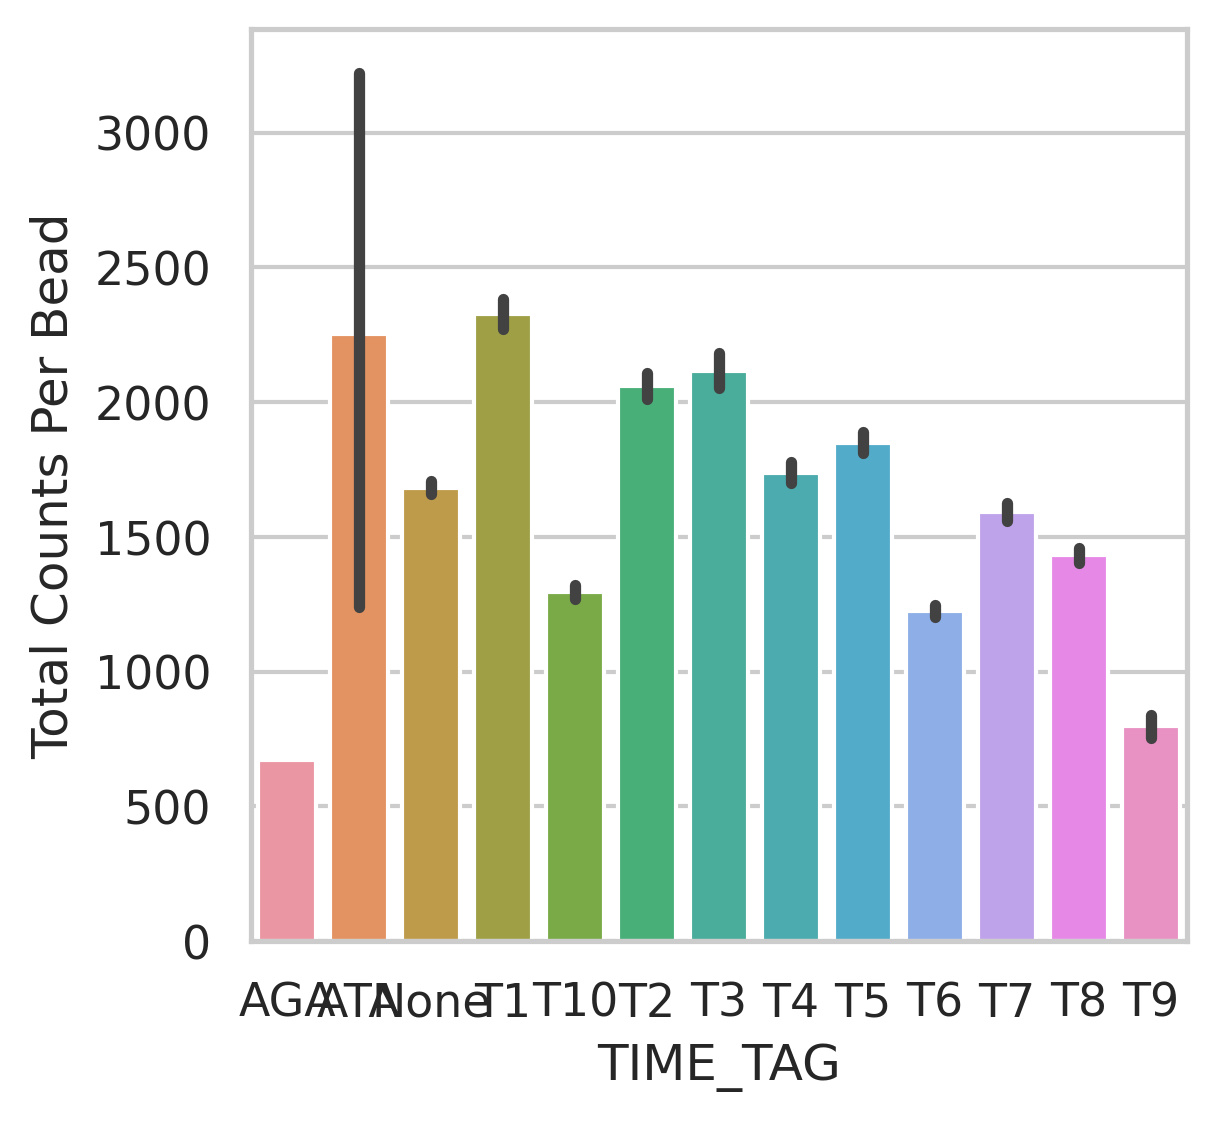

In [17]:
import seaborn as sns
from statannot import add_stat_annotation
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="TIME_TAG", y="COUNTS", data=new_combined_df.sort_values("TIME_TAG"))
ax.set(ylabel="Total Counts Per Bead")
fig=ax.get_figure()
fig.savefig("Tags_counts_bar_plot.png",dpi=600)

In [18]:
lps_dge=lps_dge.transpose()

In [19]:
lps_dge.columns=lps_dge.iloc[0]
lps_dge=lps_dge.drop(index="GENE")
lps_dge.reset_index(inplace=True)

In [20]:
df=new_combined_df.join(lps_dge)

In [21]:
df.head()

CELL_BARCODE  COUNTS TIME_TAG         index 0610005C13Rik 0610007N19Rik  \
0  CTGTCTCTTATA      65     None  CTGTCTCTTATA             0             0   
1  TGTCTCTTATAC      17     None  TGTCTCTTATAC             0             0   
2  CGATGAGTTGTA   34493     None  CGATGAGTTGTA             0             2   
3  GACCTGTCTCTT      10     None  GACCTGTCTCTT             0             0   
4  AACCTGTCTCTT       7     None  AACCTGTCTCTT             0             0   

  0610007P14Rik 0610009B22Rik 0610009D07Rik 0610009E02Rik  ... mt-Tm mt-Tp  \
0             0             0             0             0  ...     0     0   
1             0             0             0             0  ...     0     0   
2             0             2             6             0  ...     0     0   
3             0             0             0             0  ...     0     0   
4             0             0             0             0  ...     0     0   

  mt-Tq mt-Ts2 mt-Tt mt-Tv n-R5-8s1 n-R5s25 n-R5s48 n-R5s88  
0     0      0     0     0        0       0       0       0  
1     0      0     0     0        0       0       0       0  
2     0      0     0     0        0       0       0       0  
3     0      0     0     0        0       0       0       0  
4     0      0     0     0        0       0       0       0  

[5 rows x 17646 columns]

In [22]:
df=df.drop('index',axis=1)

In [23]:
df.head()

CELL_BARCODE  COUNTS TIME_TAG 0610005C13Rik 0610007N19Rik 0610007P14Rik  \
0  CTGTCTCTTATA      65     None             0             0             0   
1  TGTCTCTTATAC      17     None             0             0             0   
2  CGATGAGTTGTA   34493     None             0             2             0   
3  GACCTGTCTCTT      10     None             0             0             0   
4  AACCTGTCTCTT       7     None             0             0             0   

  0610009B22Rik 0610009D07Rik 0610009E02Rik 0610009L18Rik  ... mt-Tm mt-Tp  \
0             0             0             0             0  ...     0     0   
1             0             0             0             0  ...     0     0   
2             2             6             0             0  ...     0     0   
3             0             0             0             0  ...     0     0   
4             0             0             0             0  ...     0     0   

  mt-Tq mt-Ts2 mt-Tt mt-Tv n-R5-8s1 n-R5s25 n-R5s48 n-R5s88  
0     0      0     0     0        0       0       0       0  
1     0      0     0     0        0       0       0       0  
2     0      0     0     0        0       0       0       0  
3     0      0     0     0        0       0       0       0  
4     0      0     0     0        0       0       0       0  

[5 rows x 17645 columns]

In [24]:
countMat=df.iloc[:,3:]
countMat.index=df.iloc[:,0].to_list()

In [25]:
countMat

0610005C13Rik 0610007N19Rik 0610007P14Rik 0610009B22Rik  \
CTGTCTCTTATA             0             0             0             0   
TGTCTCTTATAC             0             0             0             0   
CGATGAGTTGTA             0             2             0             2   
GACCTGTCTCTT             0             0             0             0   
AACCTGTCTCTT             0             0             0             0   
...                    ...           ...           ...           ...   
GCGGACGTAATG             0             0             0             0   
CCCAGGCGTATG             0             0             0             0   
TCTGTCCAATCA             0             0             0             0   
GAGGATCCGTCA             0             0             0             0   
ACCCCTGAGCGA             0             0             0             0   

             0610009D07Rik 0610009E02Rik 0610009L18Rik 0610009O20Rik  \
CTGTCTCTTATA             0             0             0             0   
TGTCTCTTATAC             0             0             0             0   
CGATGAGTTGTA             6             0             0             1   
GACCTGTCTCTT             0             0             0             0   
AACCTGTCTCTT             0             0             0             0   
...                    ...           ...           ...           ...   
GCGGACGTAATG             0             0             0             0   
CCCAGGCGTATG             0             0             0             0   
TCTGTCCAATCA             0             0             0             0   
GAGGATCCGTCA             0             0             0             0   
ACCCCTGAGCGA             0             0             0             0   

             0610010F05Rik 0610010K14Rik  ... mt-Tm mt-Tp mt-Tq mt-Ts2 mt-Tt  \
CTGTCTCTTATA             0             0  ...     0     0     0      0     0   
TGTCTCTTATAC             0             0  ...     0     0     0      0     0   
CGATGAGTTGTA             0             0  ...     0     0     0      0     0   
GACCTGTCTCTT             0             0  ...     0     0     0      0     0   
AACCTGTCTCTT             0             0  ...     0     0     0      0     0   
...                    ...           ...  ...   ...   ...   ...    ...   ...   
GCGGACGTAATG             0             0  ...     0     0     0      0     0   
CCCAGGCGTATG             0             0  ...     0     0     0      0     0   
TCTGTCCAATCA             0             0  ...     0     0     0      0     0   
GAGGATCCGTCA             0             0  ...     0     0     0      0     0   
ACCCCTGAGCGA             0             0  ...     0     0     0      0     0   

             mt-Tv n-R5-8s1 n-R5s25 n-R5s48 n-R5s88  
CTGTCTCTTATA     0        0       0       0       0  
TGTCTCTTATAC     0        0       0       0       0  
CGATGAGTTGTA     0        0       0       0       0  
GACCTGTCTCTT     0        0       0       0       0  
AACCTGTCTCTT     0        0       0       0       0  
...            ...      ...     ...     ...     ...  
GCGGACGTAATG     0        0       0       0       0  
CCCAGGCGTATG     0        0       0       0       0  
TCTGTCCAATCA     0        0       0       0       0  
GAGGATCCGTCA     0        0       0       0       0  
ACCCCTGAGCGA     0        0       0       0       0  

[44048 rows x 17642 columns]

In [26]:
adata=ad.AnnData(countMat)

In [27]:
time_tag_table=df.TIME_TAG
time_tag_table.index=df.iloc[:,0].to_list()
time_tag_table.to_frame()

TIME_TAG
CTGTCTCTTATA     None
TGTCTCTTATAC     None
CGATGAGTTGTA     None
GACCTGTCTCTT     None
AACCTGTCTCTT     None
...               ...
GCGGACGTAATG      T10
CCCAGGCGTATG       T4
TCTGTCCAATCA      T10
GAGGATCCGTCA       T6
ACCCCTGAGCGA       T4

[44048 rows x 1 columns]

In [28]:
adata.obs["TIME_TAG"]=time_tag_table.to_frame()

In [29]:
adata.obs

TIME_TAG
CTGTCTCTTATA     None
TGTCTCTTATAC     None
CGATGAGTTGTA     None
GACCTGTCTCTT     None
AACCTGTCTCTT     None
...               ...
GCGGACGTAATG      T10
CCCAGGCGTATG       T4
TCTGTCCAATCA      T10
GAGGATCCGTCA       T6
ACCCCTGAGCGA       T4

[44048 rows x 1 columns]

In [30]:
adata.obs_names

Index(['CTGTCTCTTATA', 'TGTCTCTTATAC', 'CGATGAGTTGTA', 'GACCTGTCTCTT',
       'AACCTGTCTCTT', 'GGTCTGTCTCTT', 'CCTGTCTCTTAT', 'GATCTGTCTCTT',
       'AATCTGTCTCTT', 'TACCTGTCTCTT',
       ...
       'ATTCATCAGTTT', 'ATCCAGCTAGGC', 'ACCATCCCTGAC', 'GGGAGGCCAGGG',
       'AATCAGGTACTG', 'GCGGACGTAATG', 'CCCAGGCGTATG', 'TCTGTCCAATCA',
       'GAGGATCCGTCA', 'ACCCCTGAGCGA'],
      dtype='object', length=44048)

In [31]:
adata.var

Empty DataFrame
Columns: []
Index: [0610005C13Rik, 0610007N19Rik, 0610007P14Rik, 0610009B22Rik, 0610009D07Rik, 0610009E02Rik, 0610009L18Rik, 0610009O20Rik, 0610010F05Rik, 0610010K14Rik, 0610011F06Rik, 0610012H03Rik, 0610025J13Rik, 0610030E20Rik, 0610031J06Rik, 0610037L13Rik, 0610038L08Rik, 0610039K10Rik, 0610040B09Rik, 0610040B10Rik, 0610043K17Rik, 1010001B22Rik, 1010001N08Rik, 1100001G20Rik, 1110001A16Rik, 1110001J03Rik, 1110002E22Rik, 1110002J07Rik, 1110002L01Rik, 1110004E09Rik, 1110004F10Rik, 1110007C09Rik, 1110008F13Rik, 1110008J03Rik, 1110008L16Rik, 1110008P14Rik, 1110012L19Rik, 1110017D15Rik, 1110019D14Rik, 1110020A21Rik, 1110032A03Rik, 1110034G24Rik, 1110035M17Rik, 1110036E04Rik, 1110037F02Rik, 1110038B12Rik, 1110038F14Rik, 1110046J04Rik, 1110051M20Rik, 1110054M08Rik, 1110057K04Rik, 1110058L19Rik, 1110059E24Rik, 1110059G10Rik, 1110065P20Rik, 1190002N15Rik, 1190005I06Rik, 1190007I07Rik, 1200007C13Rik, 1200014J11Rik, 1300002E11Rik, 1300017J02Rik, 1500002C15Rik, 1500002O10Rik, 1500011B03Rik, 1500011K16Rik, 1500012F01Rik, 1500015L24Rik, 1500015O10Rik, 1500017E21Rik, 1500026H17Rik, 1520401A03Rik, 1600002D24Rik, 1600002H07Rik, 1600002K03Rik, 1600012H06Rik, 1600014C10Rik, 1600015I10Rik, 1600016N20Rik, 1600020E01Rik, 1600025M17Rik, 1600029D21Rik, 1700001C19Rik, 1700001G11Rik, 1700001G17Rik, 1700001L05Rik, 1700001O22Rik, 1700001P01Rik, 1700003E16Rik, 1700003F12Rik, 1700003M02Rik, 1700006J14Rik, 1700007G11Rik, 1700007K09Rik, 1700007K13Rik, 1700007L15Rik, 1700007P06Rik, 1700008F21Rik, 1700008I05Rik, 1700008O03Rik, ...]

[17642 rows x 0 columns]

In [32]:
mat=adata.to_df()

In [33]:
mat

0610005C13Rik  0610007N19Rik  0610007P14Rik  0610009B22Rik  \
CTGTCTCTTATA            0.0            0.0            0.0            0.0   
TGTCTCTTATAC            0.0            0.0            0.0            0.0   
CGATGAGTTGTA            0.0            2.0            0.0            2.0   
GACCTGTCTCTT            0.0            0.0            0.0            0.0   
AACCTGTCTCTT            0.0            0.0            0.0            0.0   
...                     ...            ...            ...            ...   
GCGGACGTAATG            0.0            0.0            0.0            0.0   
CCCAGGCGTATG            0.0            0.0            0.0            0.0   
TCTGTCCAATCA            0.0            0.0            0.0            0.0   
GAGGATCCGTCA            0.0            0.0            0.0            0.0   
ACCCCTGAGCGA            0.0            0.0            0.0            0.0   

              0610009D07Rik  0610009E02Rik  0610009L18Rik  0610009O20Rik  \
CTGTCTCTTATA            0.0            0.0            0.0            0.0   
TGTCTCTTATAC            0.0            0.0            0.0            0.0   
CGATGAGTTGTA            6.0            0.0            0.0            1.0   
GACCTGTCTCTT            0.0            0.0            0.0            0.0   
AACCTGTCTCTT            0.0            0.0            0.0            0.0   
...                     ...            ...            ...            ...   
GCGGACGTAATG            0.0            0.0            0.0            0.0   
CCCAGGCGTATG            0.0            0.0            0.0            0.0   
TCTGTCCAATCA            0.0            0.0            0.0            0.0   
GAGGATCCGTCA            0.0            0.0            0.0            0.0   
ACCCCTGAGCGA            0.0            0.0            0.0            0.0   

              0610010F05Rik  0610010K14Rik  ...  mt-Tm  mt-Tp  mt-Tq  mt-Ts2  \
CTGTCTCTTATA            0.0            0.0  ...    0.0    0.0    0.0     0.0   
TGTCTCTTATAC            0.0            0.0  ...    0.0    0.0    0.0     0.0   
CGATGAGTTGTA            0.0            0.0  ...    0.0    0.0    0.0     0.0   
GACCTGTCTCTT            0.0            0.0  ...    0.0    0.0    0.0     0.0   
AACCTGTCTCTT            0.0            0.0  ...    0.0    0.0    0.0     0.0   
...                     ...            ...  ...    ...    ...    ...     ...   
GCGGACGTAATG            0.0            0.0  ...    0.0    0.0    0.0     0.0   
CCCAGGCGTATG            0.0            0.0  ...    0.0    0.0    0.0     0.0   
TCTGTCCAATCA            0.0            0.0  ...    0.0    0.0    0.0     0.0   
GAGGATCCGTCA            0.0            0.0  ...    0.0    0.0    0.0     0.0   
ACCCCTGAGCGA            0.0            0.0  ...    0.0    0.0    0.0     0.0   

              mt-Tt  mt-Tv  n-R5-8s1  n-R5s25  n-R5s48  n-R5s88  
CTGTCTCTTATA    0.0    0.0       0.0      0.0      0.0      0.0  
TGTCTCTTATAC    0.0    0.0       0.0      0.0      0.0      0.0  
CGATGAGTTGTA    0.0    0.0       0.0      0.0      0.0      0.0  
GACCTGTCTCTT    0.0    0.0       0.0      0.0      0.0      0.0  
AACCTGTCTCTT    0.0    0.0       0.0      0.0      0.0      0.0  
...             ...    ...       ...      ...      ...      ...  
GCGGACGTAATG    0.0    0.0       0.0      0.0      0.0      0.0  
CCCAGGCGTATG    0.0    0.0       0.0      0.0      0.0      0.0  
TCTGTCCAATCA    0.0    0.0       0.0      0.0      0.0      0.0  
GAGGATCCGTCA    0.0    0.0       0.0      0.0      0.0      0.0  
ACCCCTGAGCGA    0.0    0.0       0.0      0.0      0.0      0.0  

[44048 rows x 17642 columns]

In [34]:
timepoints=["T1","T2","T3","T4","T5","T6","T7","T8","T9","T10"]

In [35]:
previous_frame=0
for tp in timepoints:
    new_frame=adata[adata.obs["TIME_TAG"]==tp].to_df().mean(0).to_frame()
    new_frame.columns=[tp]
    if type(previous_frame) is int:
        previous_frame=new_frame
    else:
        previous_frame=previous_frame.join(new_frame)
gene_mean_expression_by_timepoint_df=previous_frame
gene_mean_expression_by_timepoint_df.head()

T1        T2        T3        T4        T5        T6  \
0610005C13Rik  0.000000  0.000000  0.000495  0.000266  0.000699  0.000000   
0610007N19Rik  0.175404  0.161856  0.162296  0.134626  0.140661  0.095328   
0610007P14Rik  0.057815  0.056569  0.050470  0.041954  0.047275  0.031463   
0610009B22Rik  0.097501  0.083583  0.076200  0.071694  0.089194  0.054473   
0610009D07Rik  0.262861  0.242669  0.222167  0.184546  0.206567  0.136887   

                     T7        T8        T9       T10  
0610005C13Rik  0.000000  0.000291  0.001335  0.000000  
0610007N19Rik  0.110585  0.100495  0.065421  0.084267  
0610007P14Rik  0.035847  0.034081  0.022697  0.037514  
0610009B22Rik  0.065607  0.068453  0.026702  0.053751  
0610009D07Rik  0.163341  0.145937  0.088117  0.139138

In [36]:
df=gene_mean_expression_by_timepoint_df.loc[gene_mean_expression_by_timepoint_df.mean(1).sort_values(ascending=False).index]

In [37]:
bdata=ad.AnnData(df.T)

In [38]:
bdata.var

Empty DataFrame
Columns: []
Index: [Malat1, S100a6, Lgals1, Oaf, Rpl18a, Rpl13, Fth1, S100a4, Actb, Rps27a, Rpl23a, Rpl13a, Rps9, Rps14, Rpl32, Rplp0, Rpl41, Rps26, Rps3, Rps5, Rpl19, Rplp1, Ftl1, Rpl8, Spp1, Rpl17, Mt1, Rps2, Rps8, B2m, Rps19, Rpl14, Uba52, Pabpc1, Rplp2, Ifitm3, S100a10, Cxcl1, Cd63, Rps23, Rpl26, S100a11, Rpl31, Rpl37, Eef1a1, Ccl2, Rps15a, Rpl18, mt-Rnr2, Rpl10, Fau, Rpl23, Rps3a1, Hsp90ab1, Rps20, Rps24, Rpl9, Rpsa, Rps4x, Ppia, Mdm2, Npm1, Rpl4, Ptma, Ncl, Rpl39, Tmsb4x, Rpl37a, Rpl6, mt-Cytb, Rpl27, Rpl11, Chchd2, Rps11, Rps16, Rpl30, Rps15, Rps13, Mif, Rps28, Rps18, Rpl35, Anxa2, Rpl36a, Rps12, Rpl7, Hmgb1, Rpl12, Pfn1, Ctsl, Rps10, Hint1, Vim, Rpl36, Rpl21, Rps25, Serbp1, Cox4i1, Rpl3, Rps7, ...]

[17642 rows x 0 columns]

In [39]:
bdata.obs

Empty DataFrame
Columns: []
Index: [T1, T2, T3, T4, T5, T6, T7, T8, T9, T10]

In [40]:
sc.pp.normalize_total(bdata, target_sum=1e4)

In [41]:
sc.pp.log1p(bdata)

In [42]:
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)

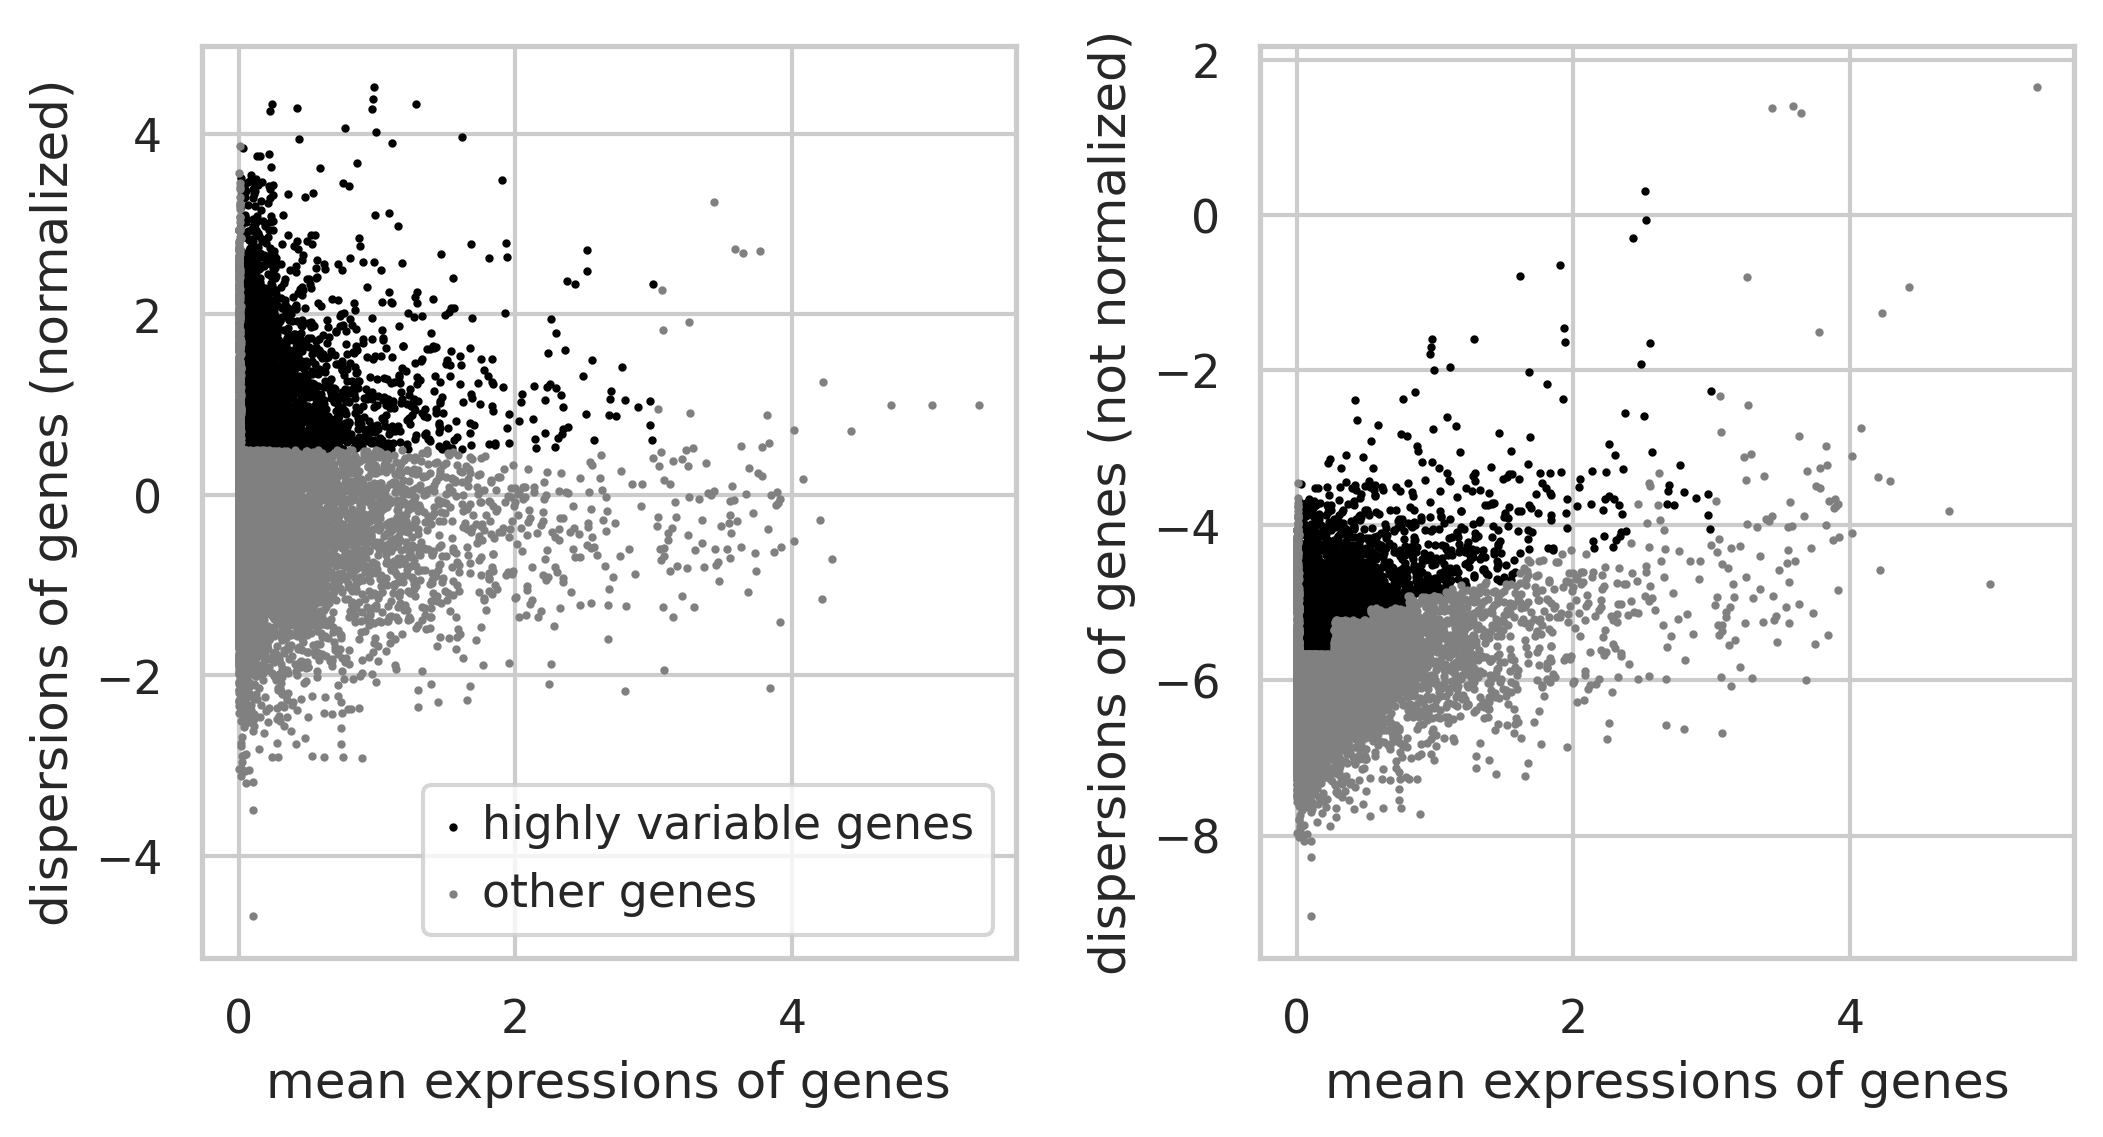

In [43]:
sc.pl.highly_variable_genes(bdata)

In [44]:
df=bdata.T[((bdata.var["highly_variable"]==True))].to_df()

In [45]:
normalized_df=((df.T-df.T.min())/(df.T.max()-df.T.min())).T

In [46]:
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

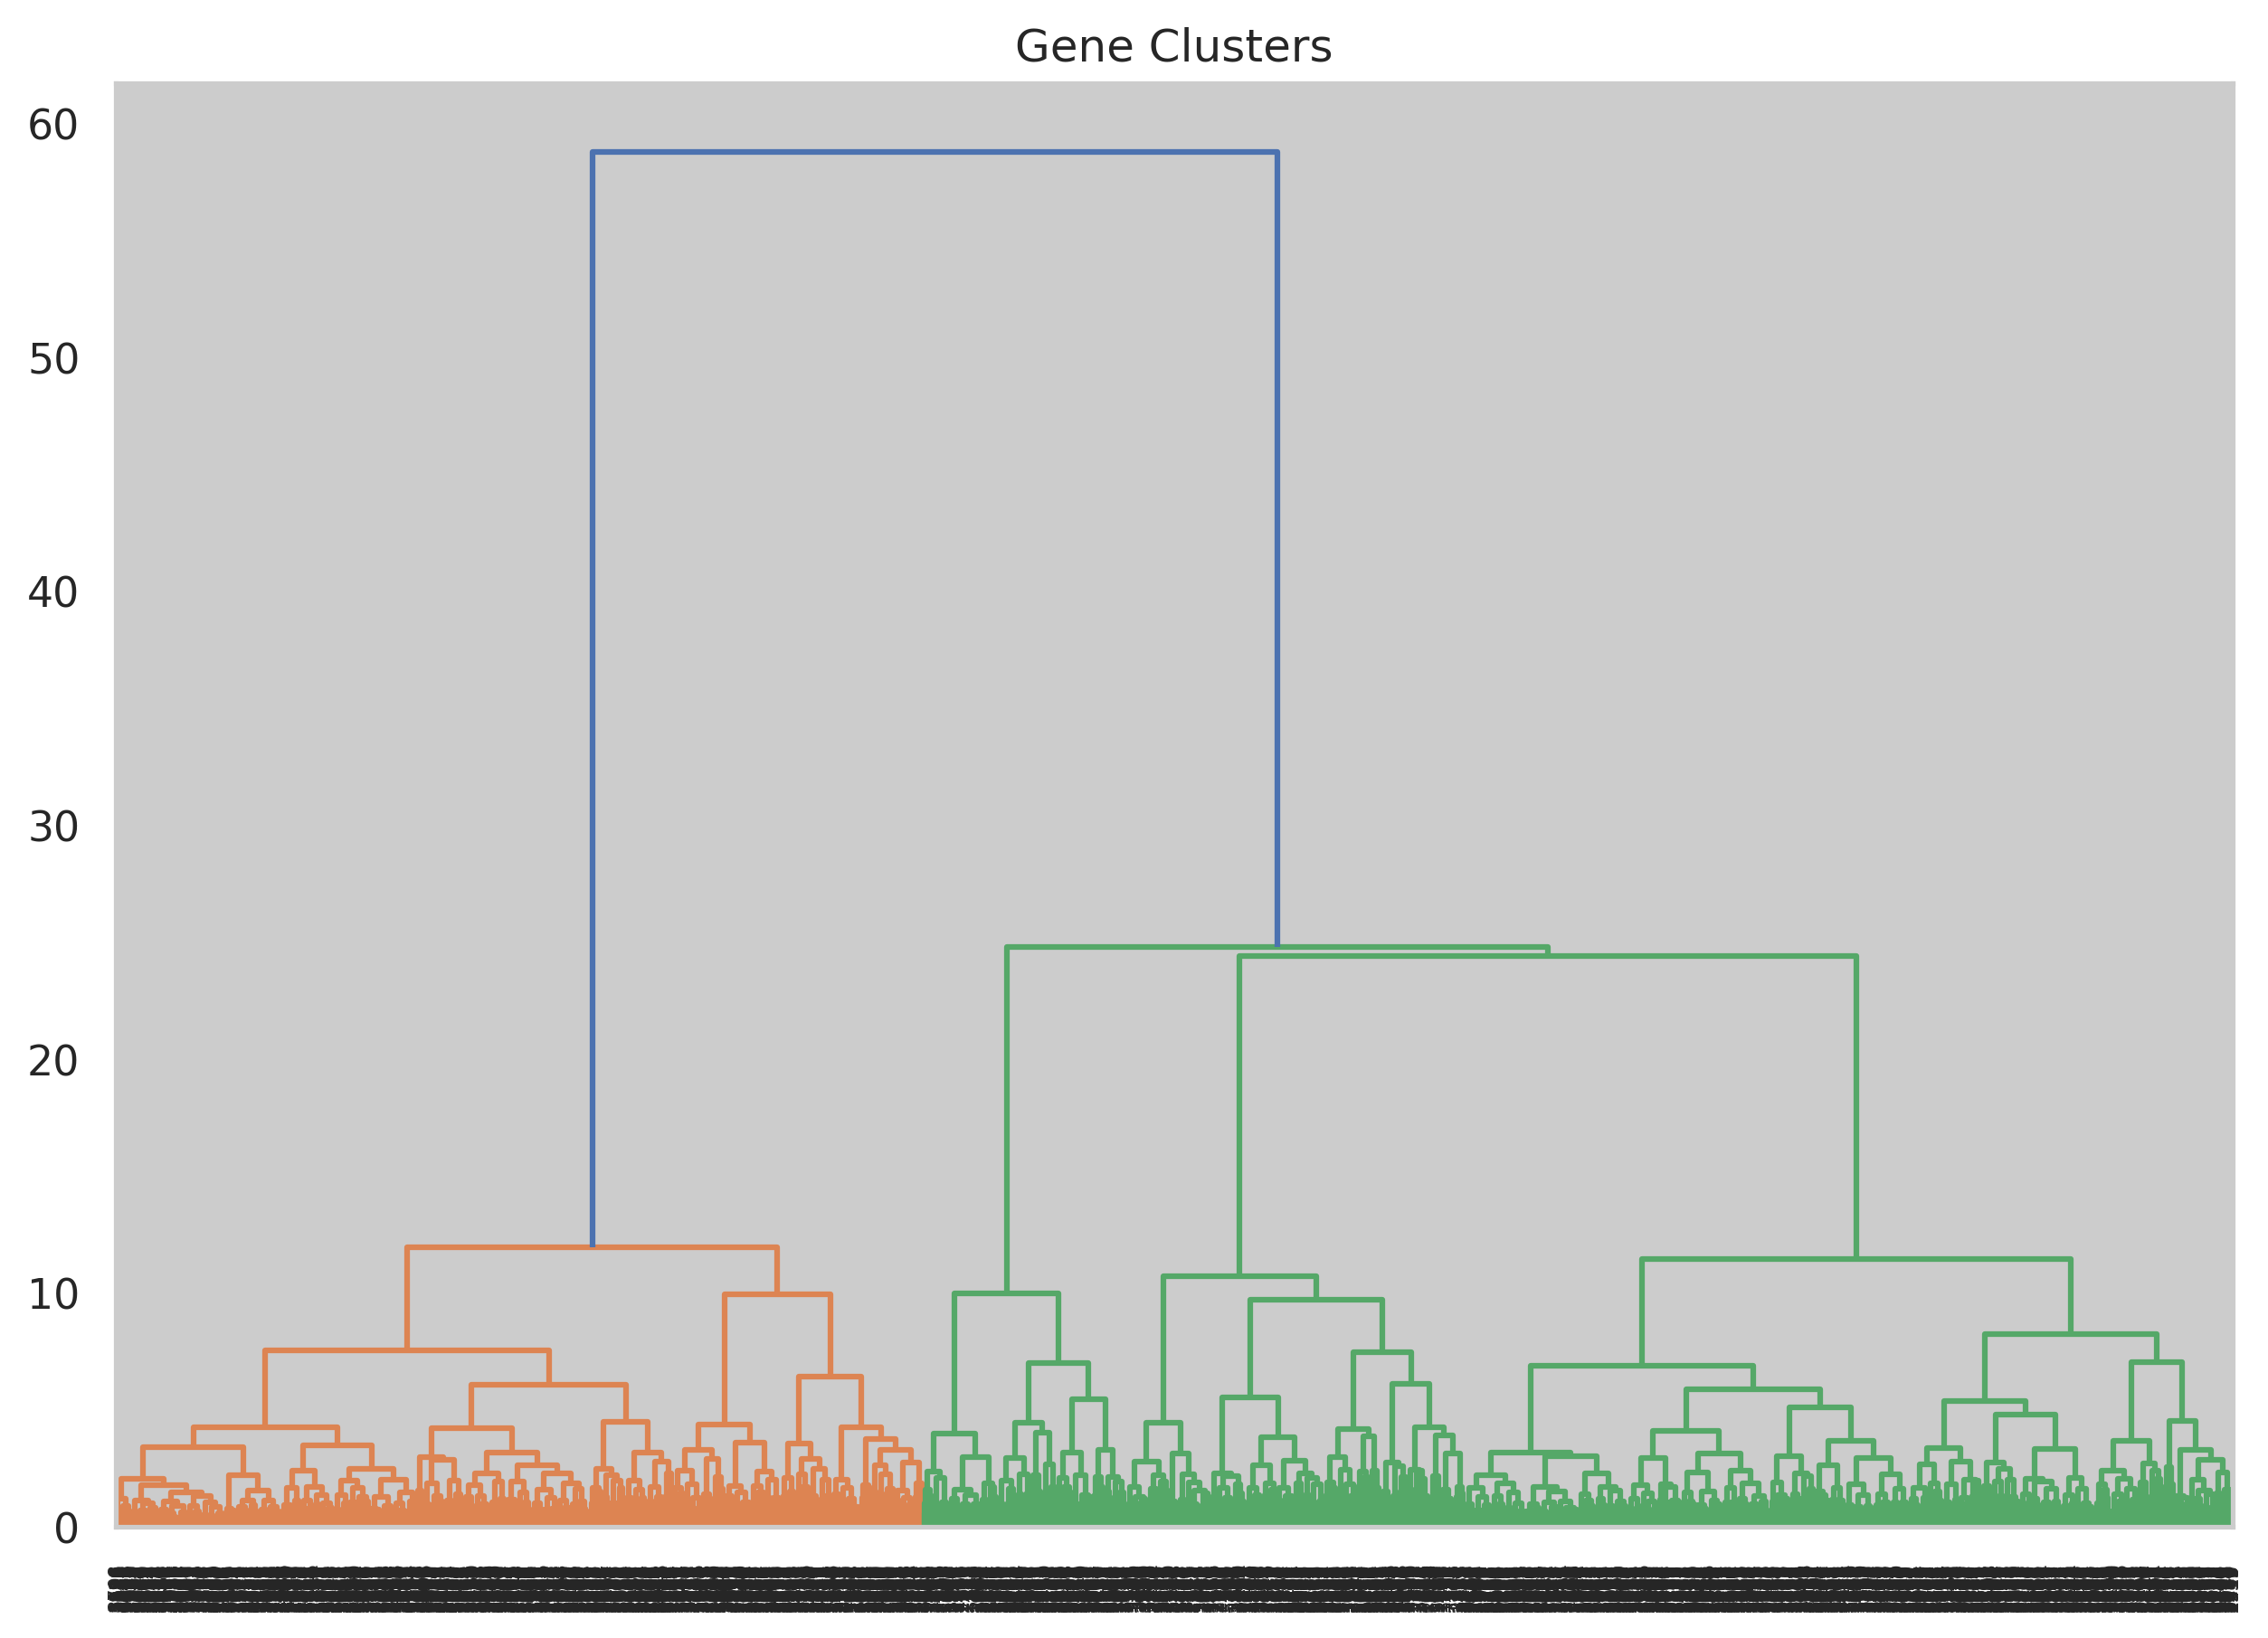

In [47]:
plt.figure(figsize=(10, 7))
plt.title("Gene Clusters")
dend = shc.dendrogram(shc.linkage(normalized_df.dropna(), method='ward'))

In [48]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward')
assignments=cluster.fit_predict(normalized_df.dropna())

(269, 10)


<AxesSubplot:ylabel='Log Normalized Expression Value'>

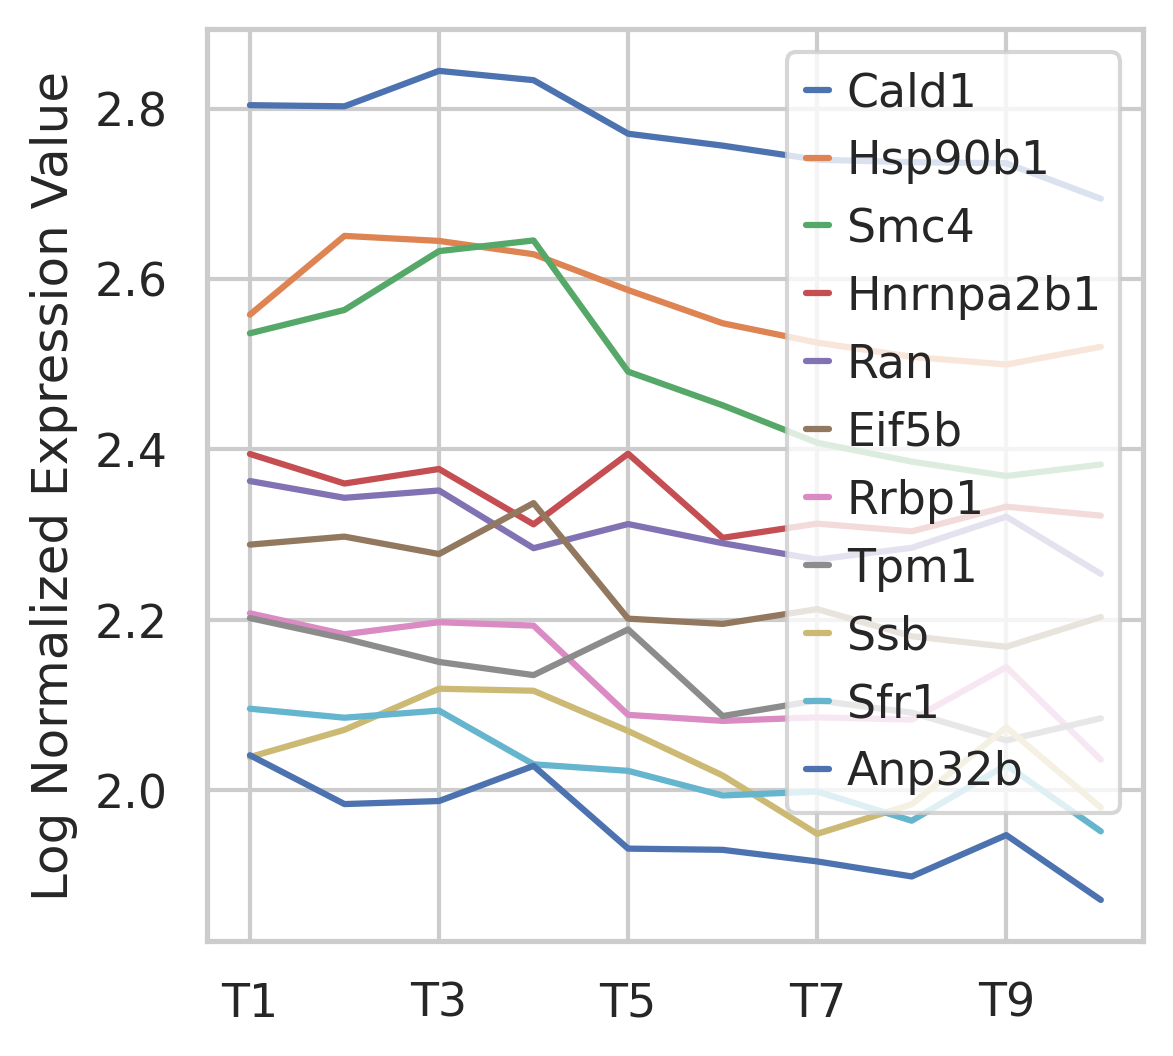

In [70]:
clus=df.loc[normalized_df.dropna()[assignments==1].index]
print(clus.shape)
clus[0:11].T.plot(ylabel="Log Normalized Expression Value")

In [115]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [116]:
adata

AnnData object with n_obs × n_vars = 42608 × 15244
    obs: 'TIME_TAG', 'n_genes'
    var: 'n_cells'

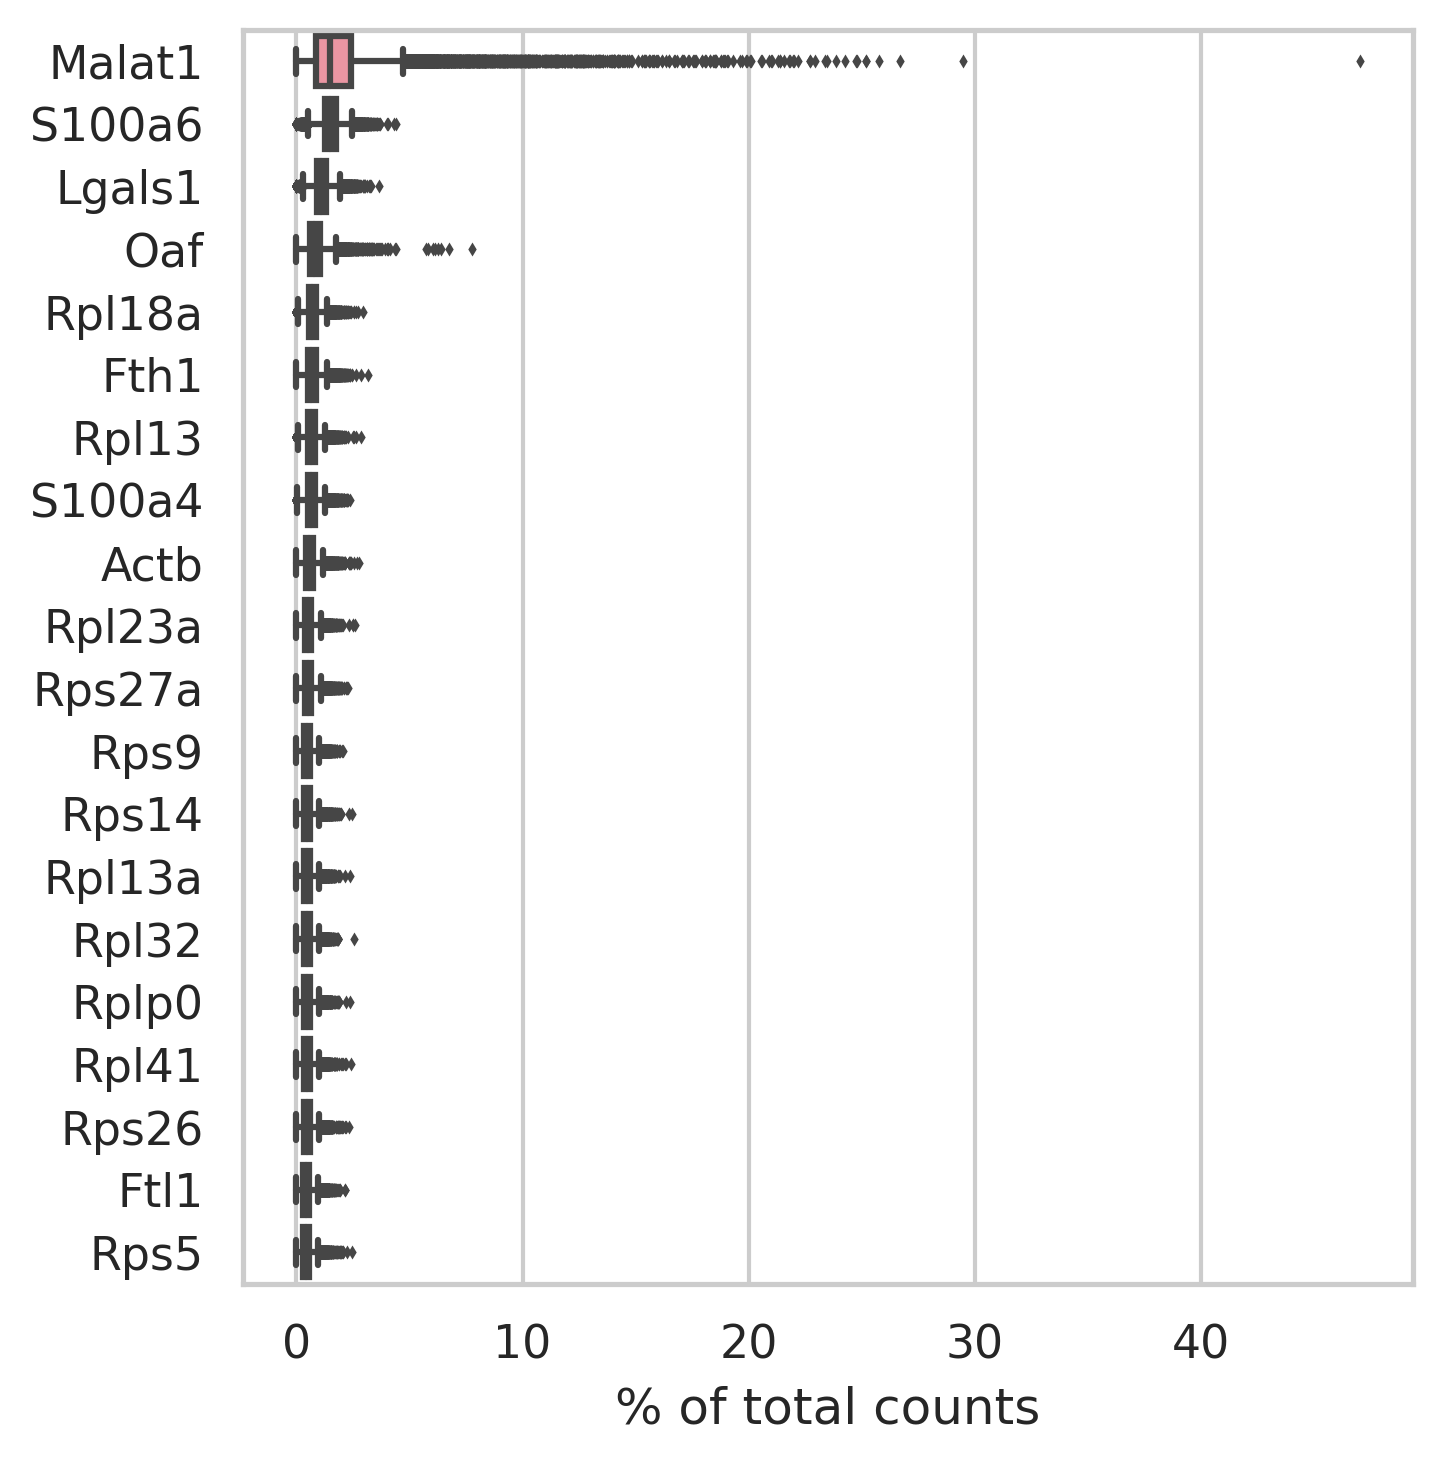

In [117]:
sc.pl.highest_expr_genes(adata,n_top=20,)

In [118]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'TIME_TAG' as categorical


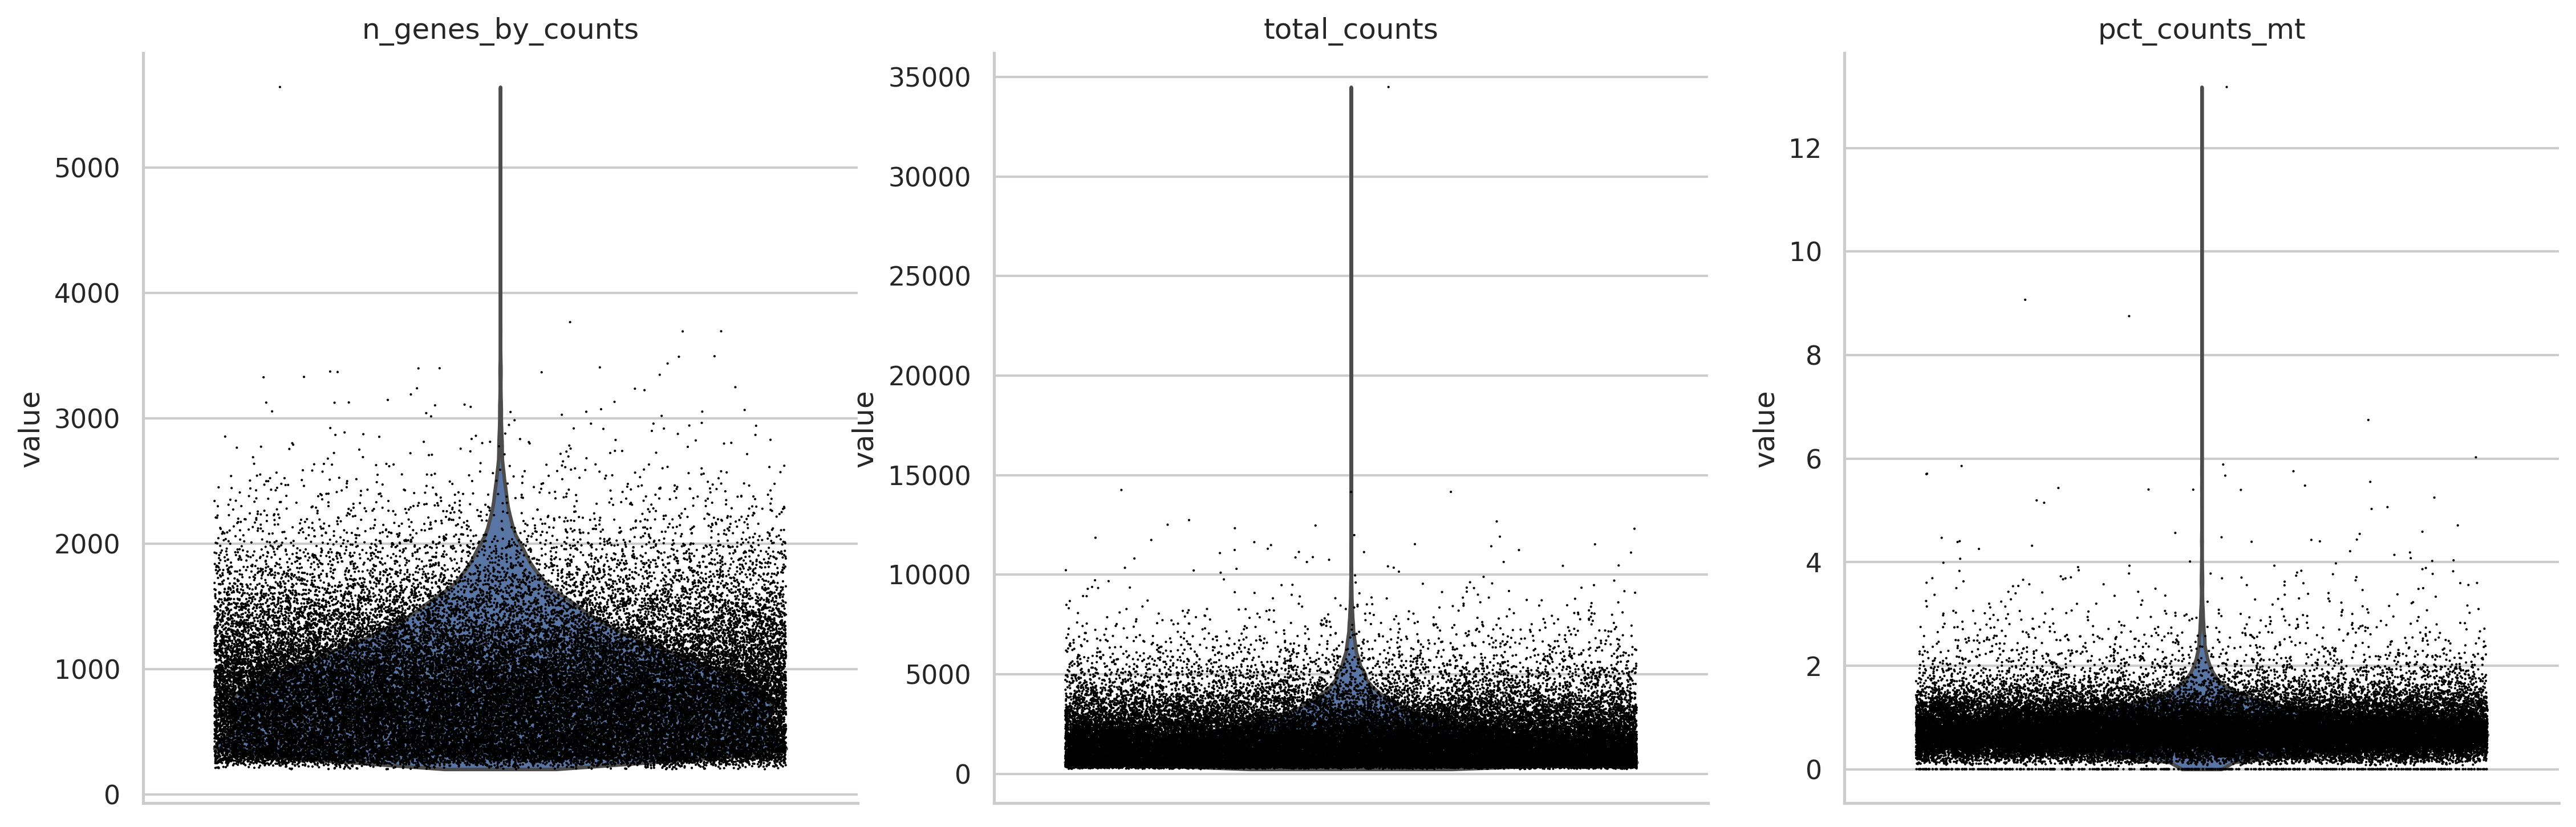

In [119]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [120]:
adata

AnnData object with n_obs × n_vars = 42608 × 15244
    obs: 'TIME_TAG', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

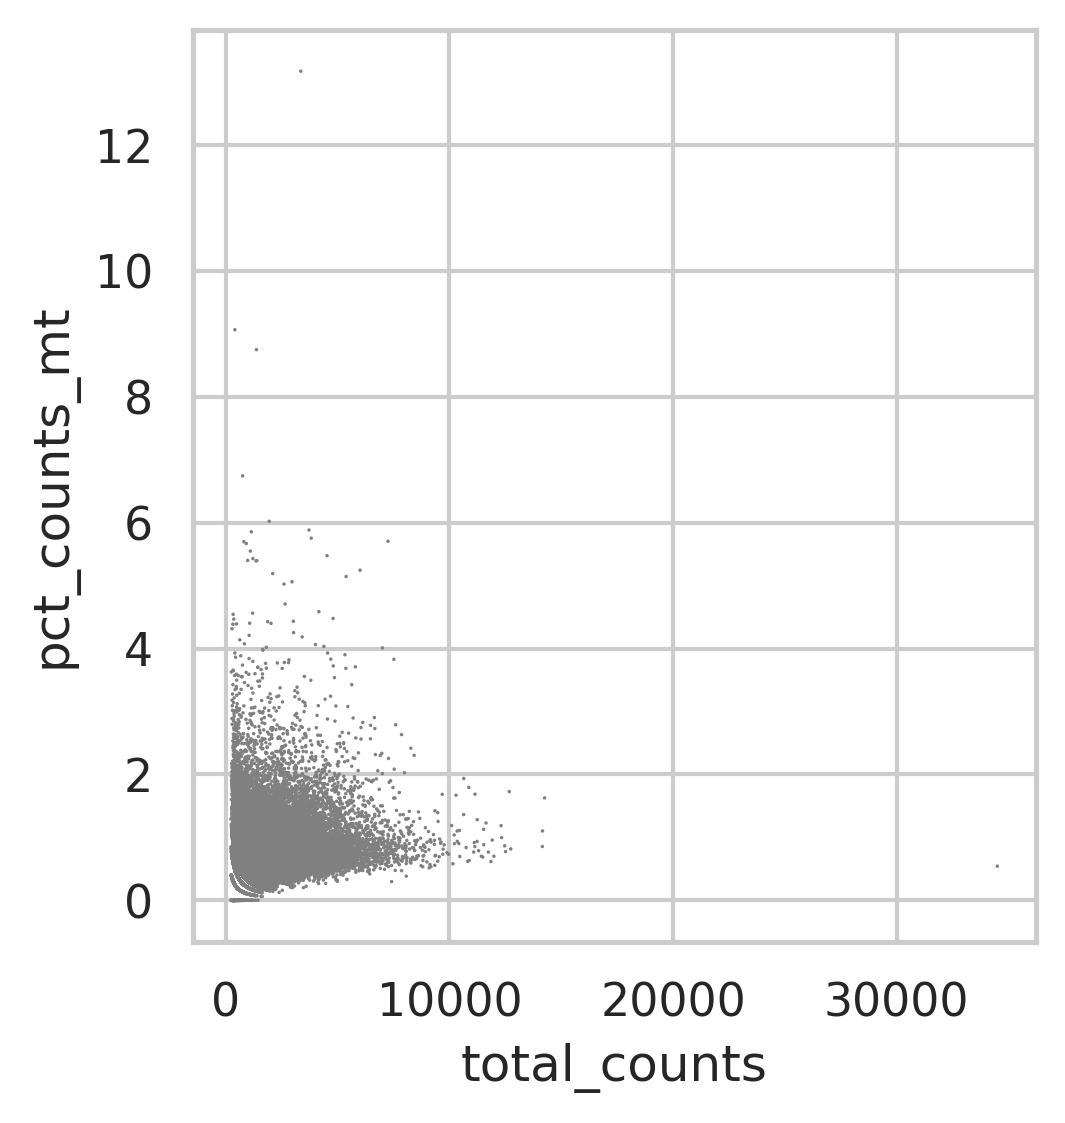

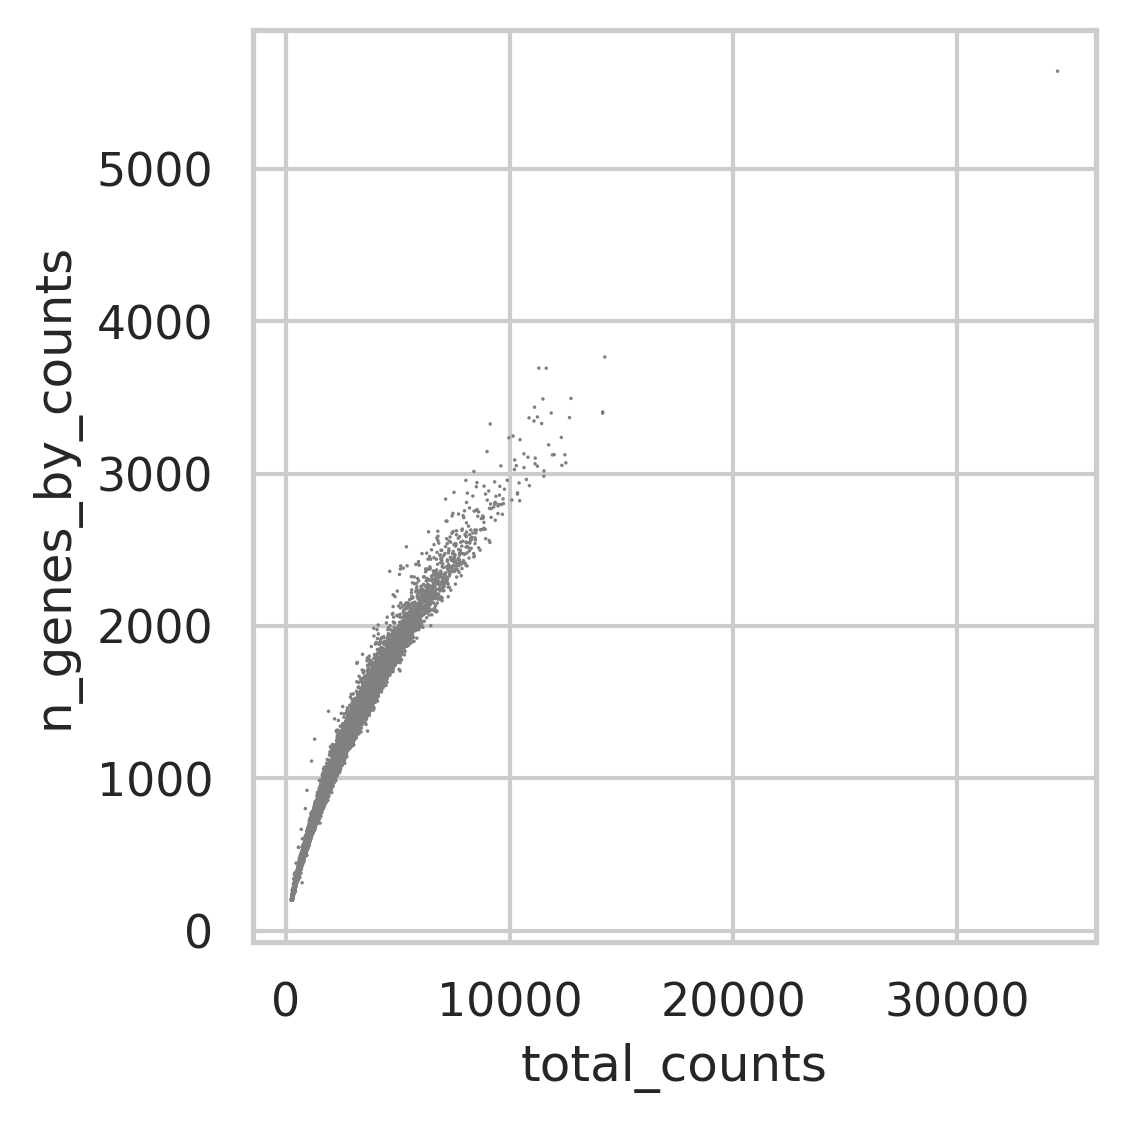

In [121]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [122]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [123]:
adata

View of AnnData object with n_obs × n_vars = 42586 × 15244
    obs: 'TIME_TAG', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [124]:
adata.var

n_cells     mt  n_cells_by_counts  mean_counts  \
0610005C13Rik       10  False                 10     0.000235   
0610007N19Rik     4919  False               4919     0.131618   
0610007P14Rik     1757  False               1757     0.044593   
0610009B22Rik     2862  False               2862     0.074493   
0610009D07Rik     6941  False               6941     0.195691   
...                ...    ...                ...          ...   
mt-Tq                7   True                  7     0.000164   
mt-Ts2               7   True                  7     0.000164   
mt-Tt               49   True                 49     0.001150   
mt-Tv               21   True                 21     0.000493   
n-R5-8s1             3  False                  3     0.000070   

               pct_dropout_by_counts  total_counts  
0610005C13Rik              99.976530          10.0  
0610007N19Rik              88.455220        5608.0  
0610007P14Rik              95.876361        1900.0  
0610009B22Rik              93.282952        3174.0  
0610009D07Rik              83.709632        8338.0  
...                              ...           ...  
mt-Tq                      99.983571           7.0  
mt-Ts2                     99.983571           7.0  
mt-Tt                      99.884998          49.0  
mt-Tv                      99.950713          21.0  
n-R5-8s1                   99.992959           3.0  

[15244 rows x 6 columns]

In [125]:
sc.pp.normalize_total(adata, target_sum=1e4)

/stg1/data2/kanishk/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [126]:
sc.pp.log1p(adata)

In [127]:
adata.obs

TIME_TAG  n_genes  n_genes_by_counts  total_counts  \
CGATGAGTTGTA     None     5643               5643       34493.0   
CTTTGGTTTCTC       T5     3439               3437       11110.0   
CCCCGAGTTGTA       T1     3407               3406       14159.0   
GACCACCCGGCT       T1     3126               3126       11988.0   
CGCAGTTTCGCT     None     3055               3055       12334.0   
...               ...      ...                ...           ...   
GCGGACGTAATG      T10      235                235         285.0   
CCCAGGCGTATG       T4      271                271         373.0   
TCTGTCCAATCA      T10      204                204         260.0   
GAGGATCCGTCA       T6      213                213         272.0   
ACCCCTGAGCGA       T4      281                281         366.0   

              total_counts_mt  pct_counts_mt  
CGATGAGTTGTA            187.0       0.542139  
CTTTGGTTTCTC            102.0       0.918092  
CCCCGAGTTGTA            156.0       1.101773  
GACCACCCGGCT             84.0       0.700701  
CGCAGTTTCGCT            123.0       0.997243  
...                       ...            ...  
GCGGACGTAATG              3.0       1.052632  
CCCAGGCGTATG              5.0       1.340483  
TCTGTCCAATCA              2.0       0.769231  
GAGGATCCGTCA              2.0       0.735294  
ACCCCTGAGCGA              2.0       0.546448  

[42586 rows x 6 columns]

In [128]:
adata.var

n_cells     mt  n_cells_by_counts  mean_counts  \
0610005C13Rik       10  False                 10     0.000235   
0610007N19Rik     4919  False               4919     0.131618   
0610007P14Rik     1757  False               1757     0.044593   
0610009B22Rik     2862  False               2862     0.074493   
0610009D07Rik     6941  False               6941     0.195691   
...                ...    ...                ...          ...   
mt-Tq                7   True                  7     0.000164   
mt-Ts2               7   True                  7     0.000164   
mt-Tt               49   True                 49     0.001150   
mt-Tv               21   True                 21     0.000493   
n-R5-8s1             3  False                  3     0.000070   

               pct_dropout_by_counts  total_counts  
0610005C13Rik              99.976530          10.0  
0610007N19Rik              88.455220        5608.0  
0610007P14Rik              95.876361        1900.0  
0610009B22Rik              93.282952        3174.0  
0610009D07Rik              83.709632        8338.0  
...                              ...           ...  
mt-Tq                      99.983571           7.0  
mt-Ts2                     99.983571           7.0  
mt-Tt                      99.884998          49.0  
mt-Tv                      99.950713          21.0  
n-R5-8s1                   99.992959           3.0  

[15244 rows x 6 columns]

In [129]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

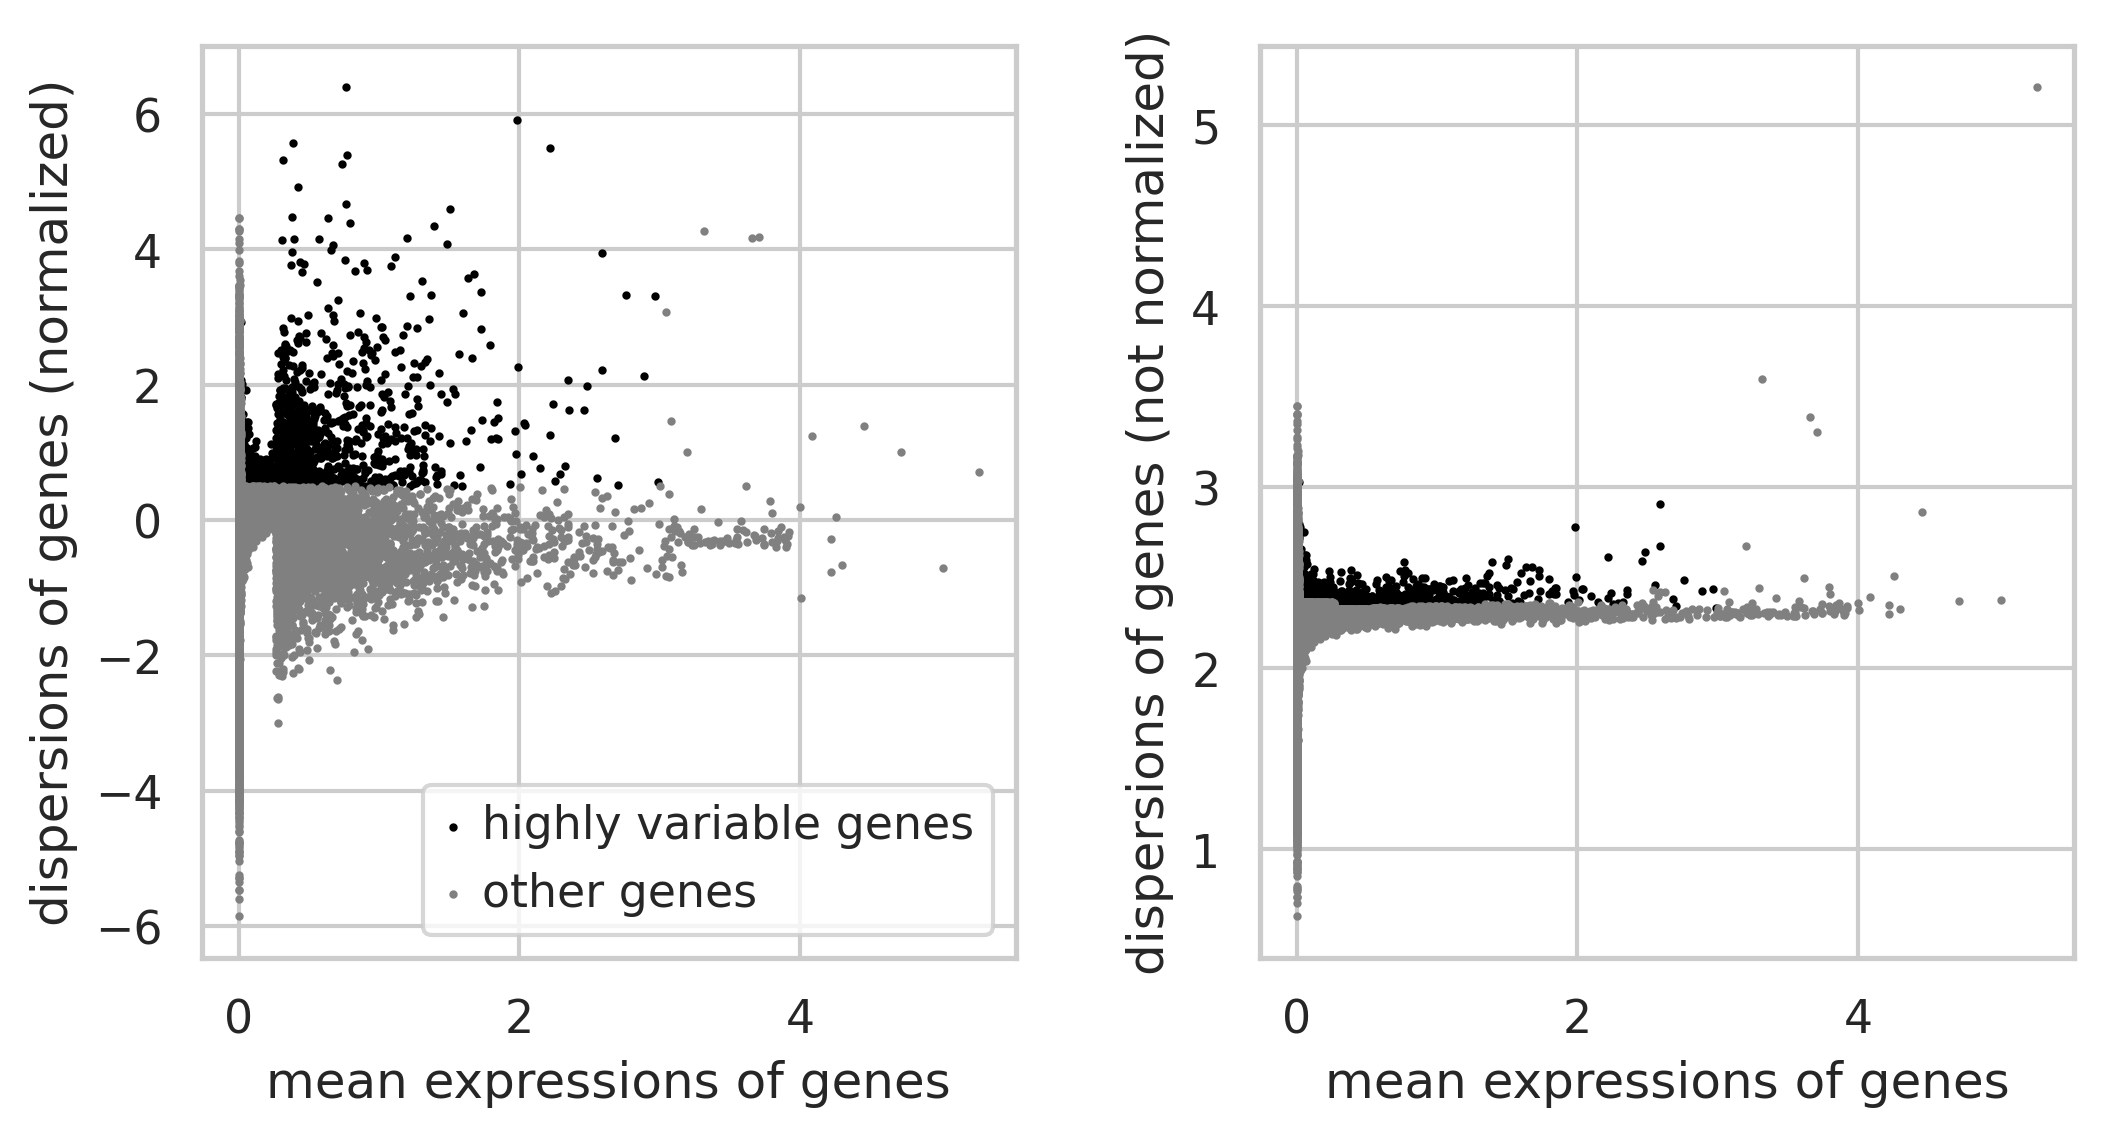

In [130]:
sc.pl.highly_variable_genes(adata)

In [131]:
adata.var

n_cells     mt  n_cells_by_counts  mean_counts  \
0610005C13Rik       10  False                 10     0.000235   
0610007N19Rik     4919  False               4919     0.131618   
0610007P14Rik     1757  False               1757     0.044593   
0610009B22Rik     2862  False               2862     0.074493   
0610009D07Rik     6941  False               6941     0.195691   
...                ...    ...                ...          ...   
mt-Tq                7   True                  7     0.000164   
mt-Ts2               7   True                  7     0.000164   
mt-Tt               49   True                 49     0.001150   
mt-Tv               21   True                 21     0.000493   
n-R5-8s1             3  False                  3     0.000070   

               pct_dropout_by_counts  total_counts  highly_variable     means  \
0610005C13Rik              99.976530          10.0            False  0.000874   
0610007N19Rik              88.455220        5608.0            False  0.562304   
0610007P14Rik              95.876361        1900.0            False  0.232126   
0610009B22Rik              93.282952        3174.0             True  0.367330   
0610009D07Rik              83.709632        8338.0            False  0.746189   
...                              ...           ...              ...       ...   
mt-Tq                      99.983571           7.0            False  0.000950   
mt-Ts2                     99.983571           7.0            False  0.000559   
mt-Tt                      99.884998          49.0            False  0.006586   
mt-Tv                      99.950713          21.0            False  0.002155   
n-R5-8s1                   99.992959           3.0            False  0.000211   

               dispersions  dispersions_norm  
0610005C13Rik     1.433590         -2.912235  
0610007N19Rik     2.289918         -0.601797  
0610007P14Rik     2.322328          0.338763  
0610009B22Rik     2.362352          1.274846  
0610009D07Rik     2.286501         -0.682797  
...                    ...               ...  
mt-Tq             2.480840          0.918597  
mt-Ts2            1.311739         -3.357964  
mt-Tt             2.275915          0.168982  
mt-Tv             1.905972         -1.184264  
n-R5-8s1          1.229562         -3.658568  

[15244 rows x 10 columns]

In [132]:
adata.raw = adata

In [133]:
temp=adata

In [134]:
temp = temp[:, adata.var.highly_variable]

In [135]:
sc.pp.regress_out(temp, ['total_counts', 'pct_counts_mt'])

In [136]:
sc.pp.scale(temp, max_value=10)

In [137]:
sc.tl.pca(temp, svd_solver='arpack')


In [138]:
import matplotlib as mpl

In [139]:
sc.set_figure_params(dpi=150)

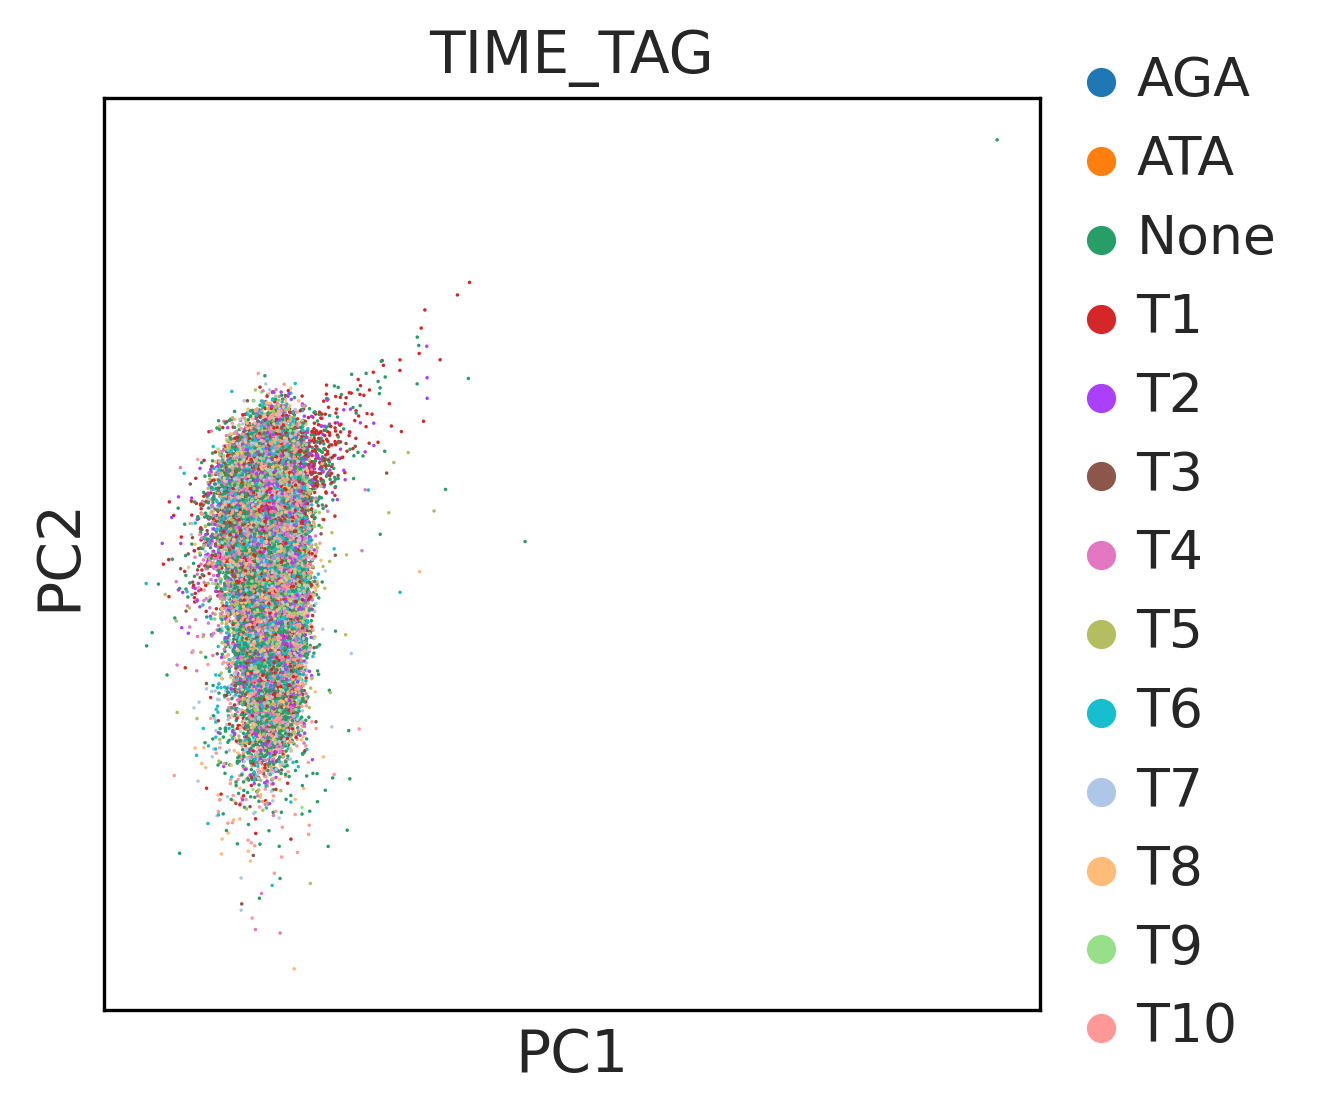

In [140]:
sc.pl.pca(temp, color="TIME_TAG",palette=mpl.rcParams["axes.prop_cycle"],projection="2d")

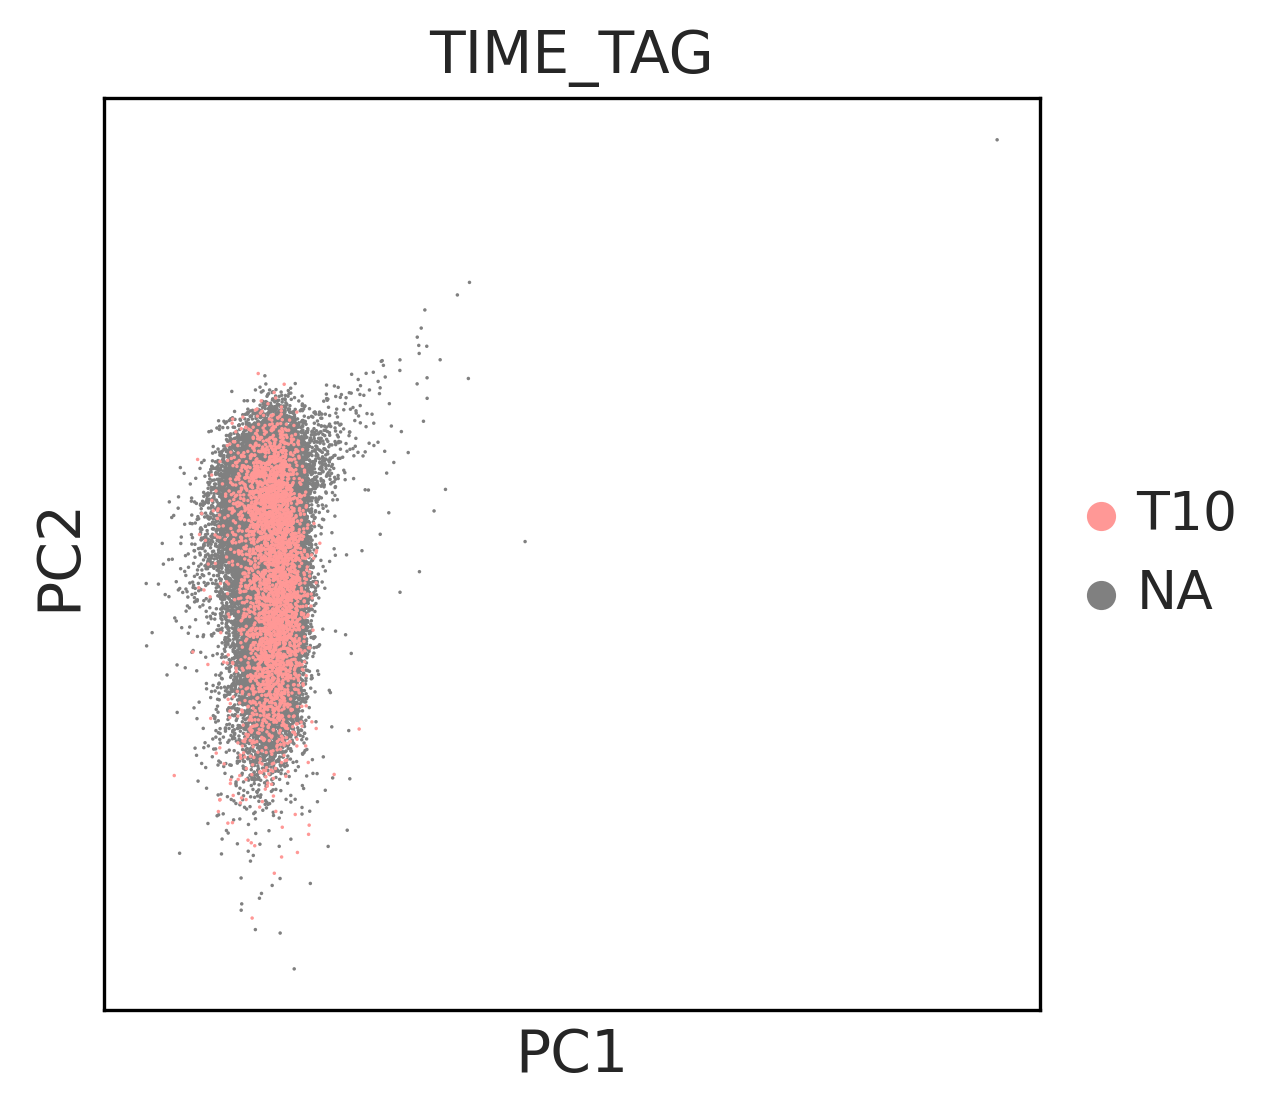

In [141]:
sc.pl.pca(temp, color="TIME_TAG",groups=["T10"],palette=mpl.rcParams["axes.prop_cycle"],projection='2d',na_color="gray")

In [142]:
adata=temp

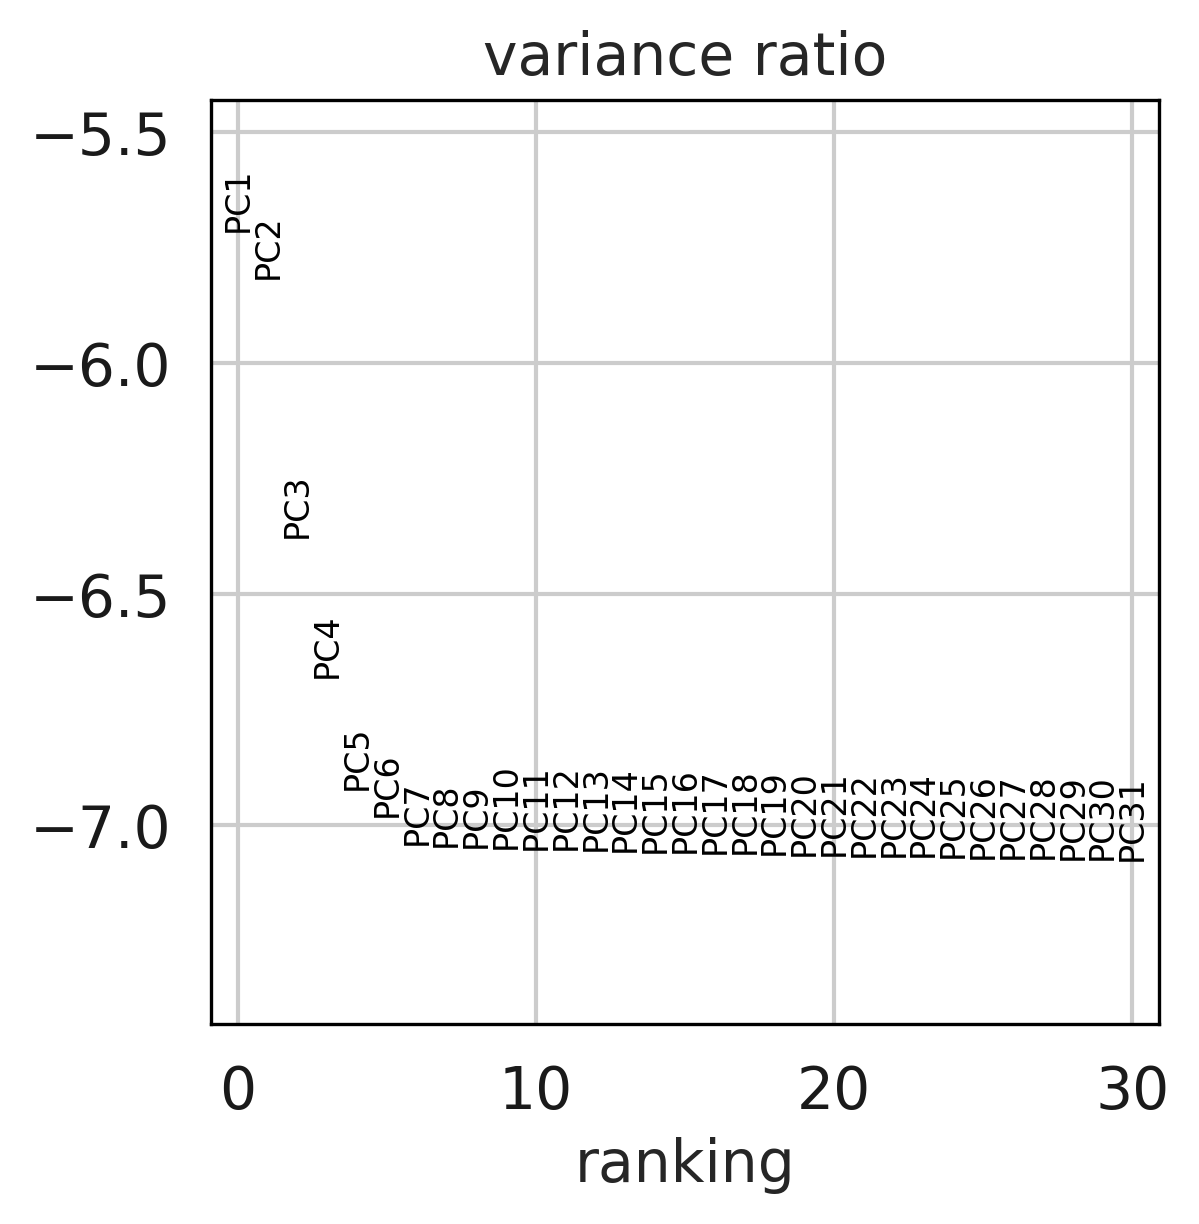

In [143]:
sc.pl.pca_variance_ratio(adata, log=True)

In [144]:
len(adata.var)

1938

In [145]:
results_file = 'lps3k.h5ad'

In [146]:
adata.write(results_file)

In [147]:
adata

AnnData object with n_obs × n_vars = 42586 × 1938
    obs: 'TIME_TAG', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'TIME_TAG_colors'
    obsm: 'X_pca'
    varm: 'PCs'

In [148]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [149]:
sc.tl.umap(adata)

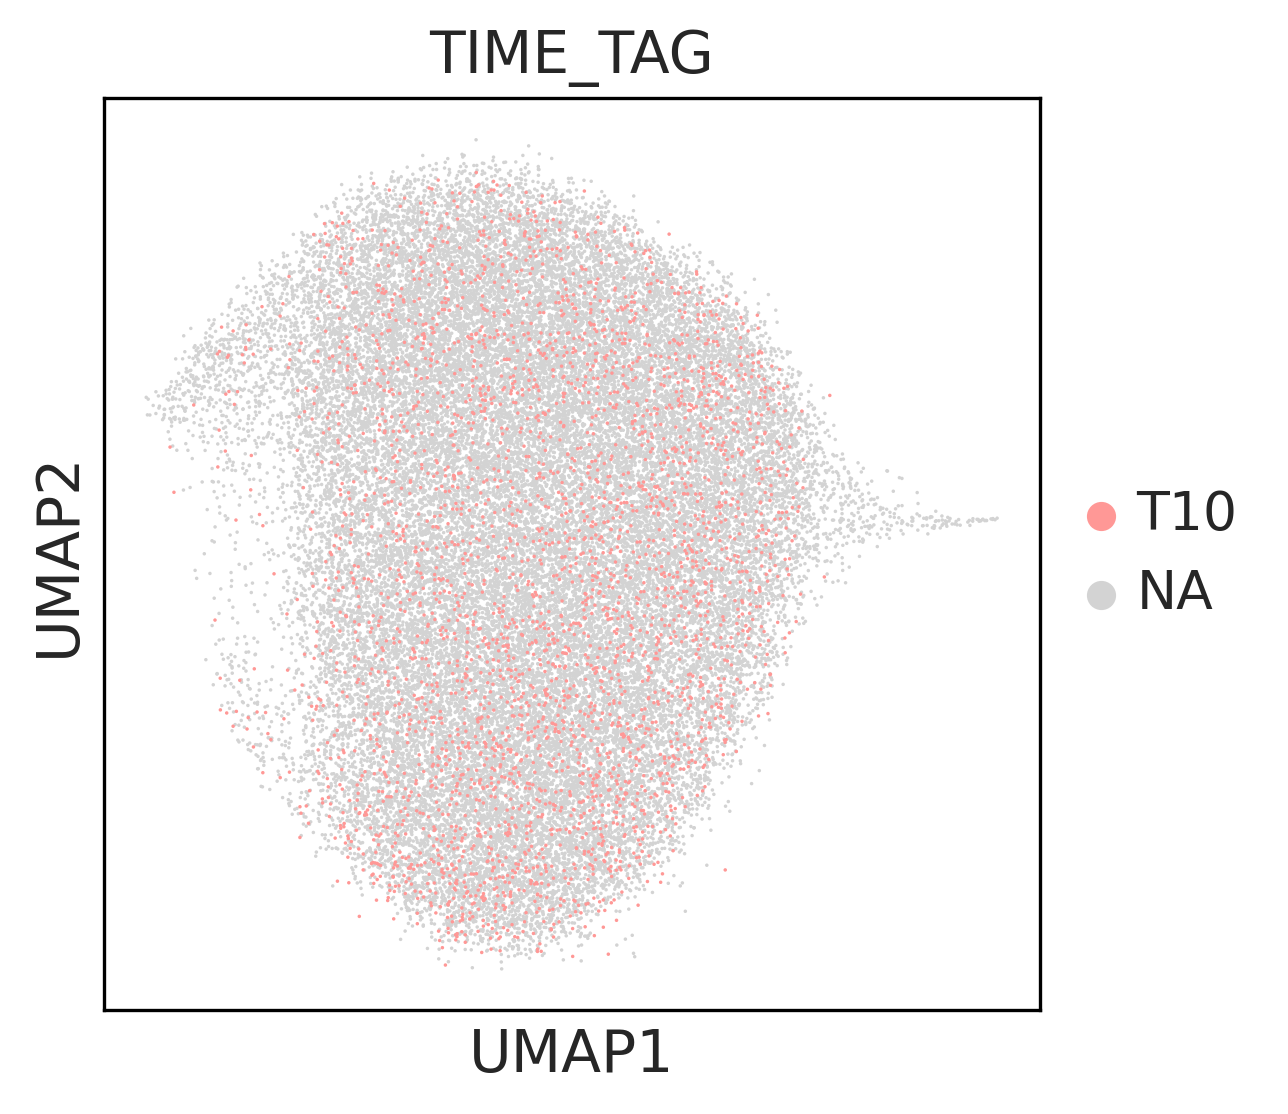

In [150]:
sc.pl.umap(adata,color="TIME_TAG",groups="T10")

In [151]:
sc.tl.tsne(adata)

/stg1/data2/kanishk/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


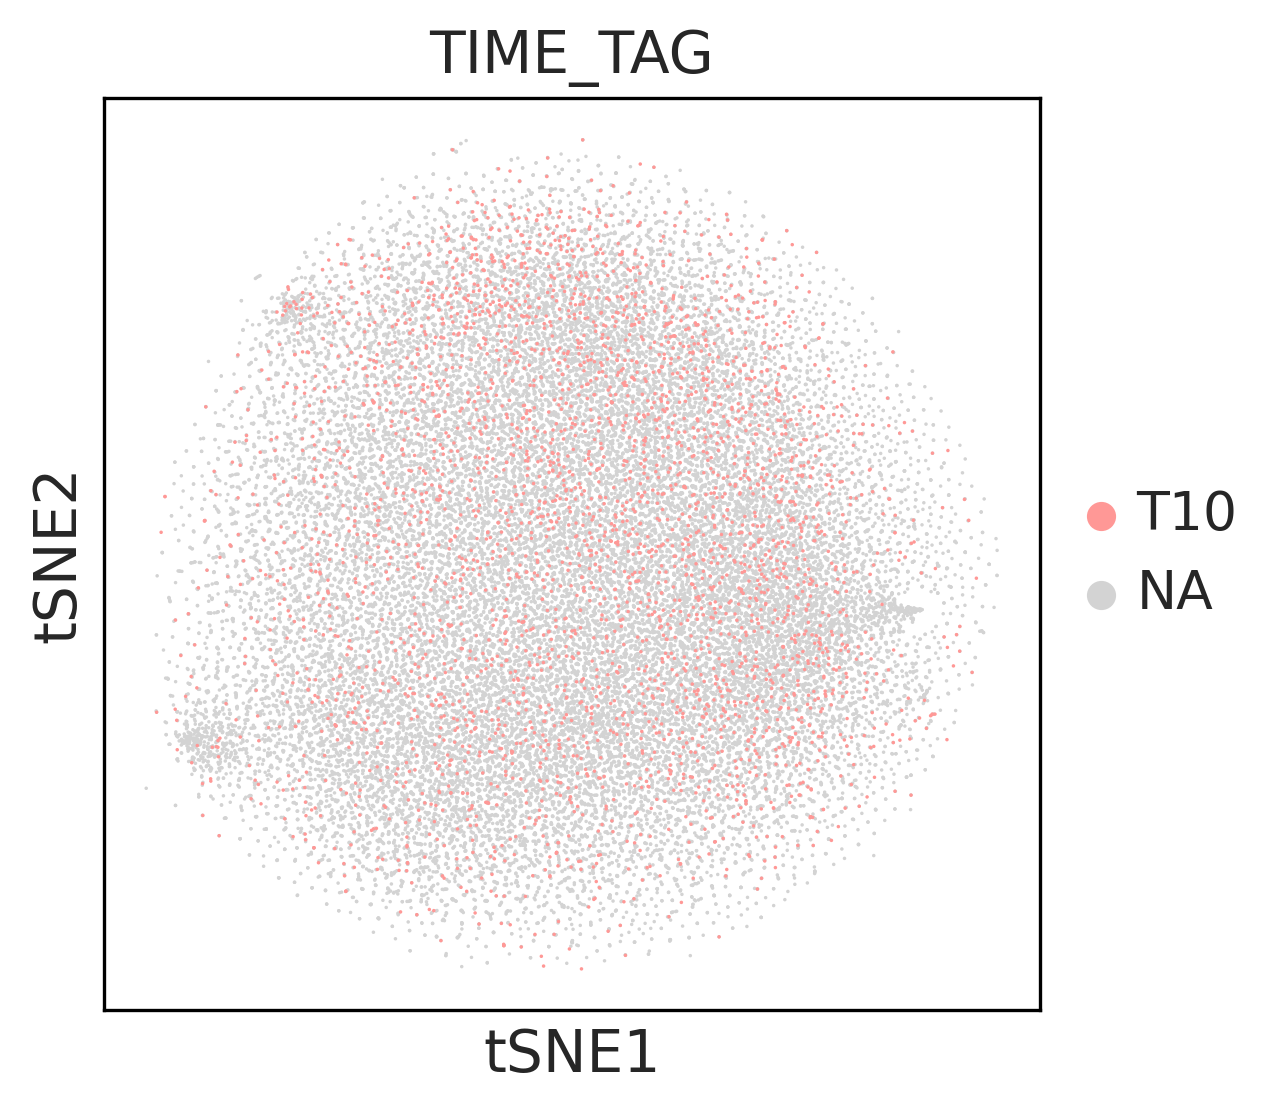

In [152]:
sc.pl.tsne(adata,color="TIME_TAG",groups="T10",palette=mpl.rcParams["axes.prop_cycle"])

In [153]:
adata=adata.raw.to_adata()

In [101]:
mat=adata.T[((adata.var["highly_variable"]==True) & (adata.var["mean_counts"]>1))].to_df().T

In [87]:
timepoints=["T1","T2","T3","T4","T5","T6","T7","T8","T9","T10"]

In [88]:
previous_frame=0
for tp in timepoints:
    new_frame=adata[adata.obs["TIME_TAG"]==tp].to_df().mean(0).to_frame()
    new_frame.columns=[tp]
    if type(previous_frame) is int:
        previous_frame=new_frame
    else:
        previous_frame=previous_frame.join(new_frame)
gene_mean_expression_by_timepoint_df=previous_frame
gene_mean_expression_by_timepoint_df.head()

T1        T2        T3        T4        T5        T6  \
A1BG      0.005770  0.007220  0.004104  0.009316  0.007805  0.005711   
A1BG-AS1  0.006451  0.002482  0.005368  0.008054  0.009932  0.006438   
A1CF      0.000000  0.000000  0.001010  0.000000  0.000000  0.000000   
A4GALT    0.000596  0.000000  0.000000  0.000000  0.000000  0.000000   
AAAS      0.095020  0.085377  0.078062  0.077076  0.082181  0.073784   

                T7        T8        T9       T10  
A1BG      0.005411  0.008721  0.000000  0.007144  
A1BG-AS1  0.001682  0.005762  0.006106  0.007408  
A1CF      0.000000  0.000000  0.000000  0.000000  
A4GALT    0.000000  0.000000  0.000000  0.000000  
AAAS      0.086646  0.080302  0.067983  0.062731

In [89]:
df=gene_mean_expression_by_timepoint_df.loc[gene_mean_expression_by_timepoint_df.mean(1).sort_values(ascending=False).index]

In [90]:
normalized_df=((df.T-df.T.min())/(df.T.max()-df.T.min())).T

In [91]:
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

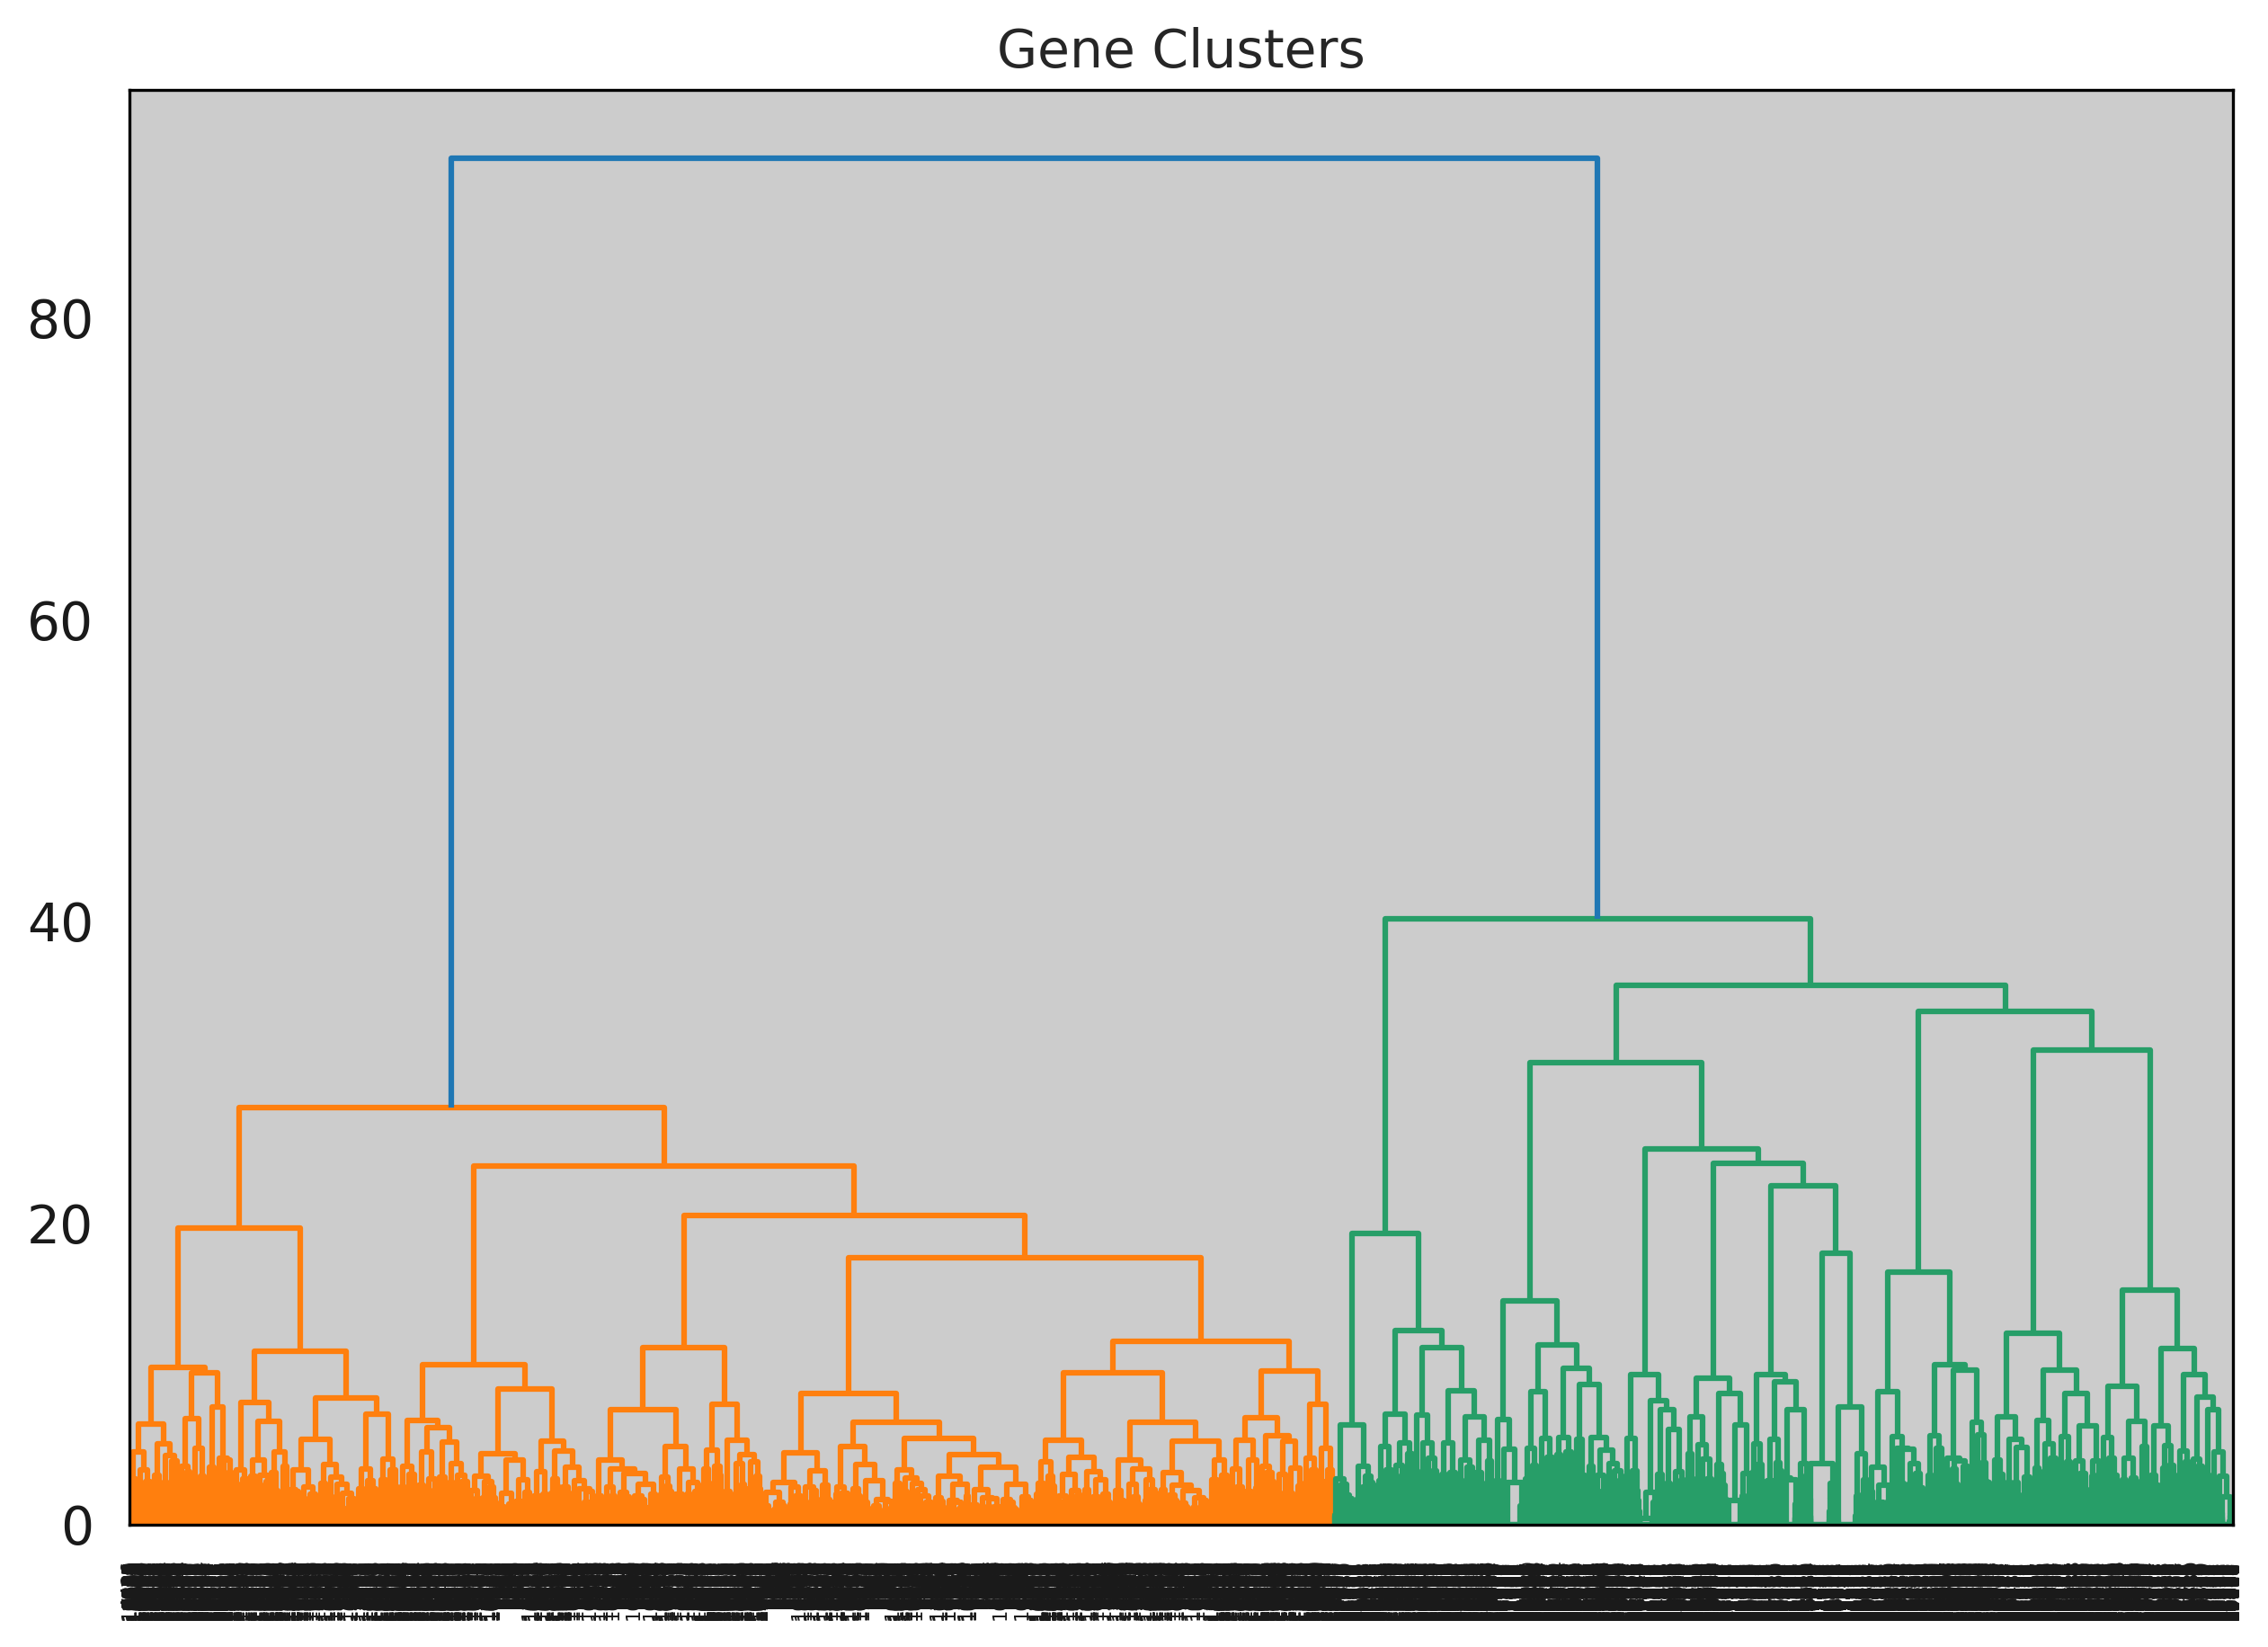

In [92]:
plt.figure(figsize=(10, 7))
plt.title("Gene Clusters")
dend = shc.dendrogram(shc.linkage(normalized_df.dropna(), method='ward'))

In [93]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
assignments=cluster.fit_predict(normalized_df.dropna())

<AxesSubplot:>

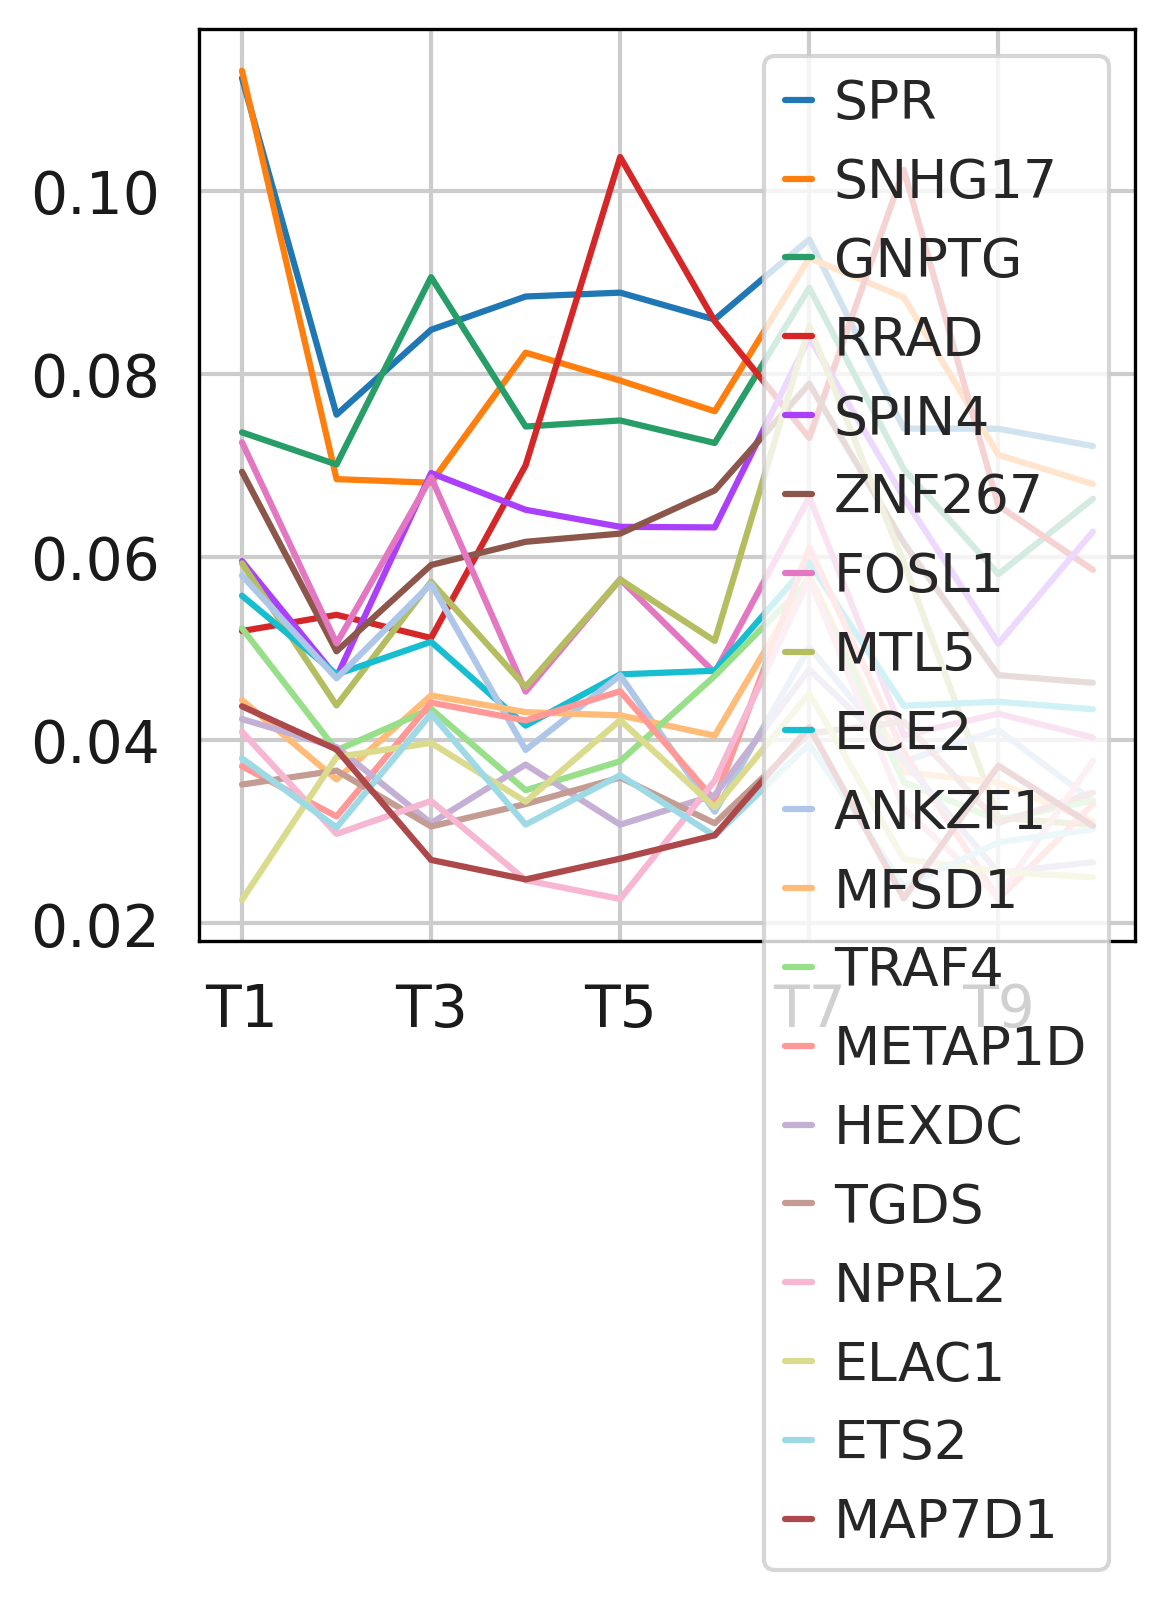

In [111]:
df.loc[normalized_df.dropna()[assignments==5].index][1:20].T.plot()

In [ ]:
assi=pd.DataFrame(assignments)
assi.hist()

In [ ]:
normalized_df.loc[mat.columns].T.plot()

## Most Variable Genes Only

In [58]:
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

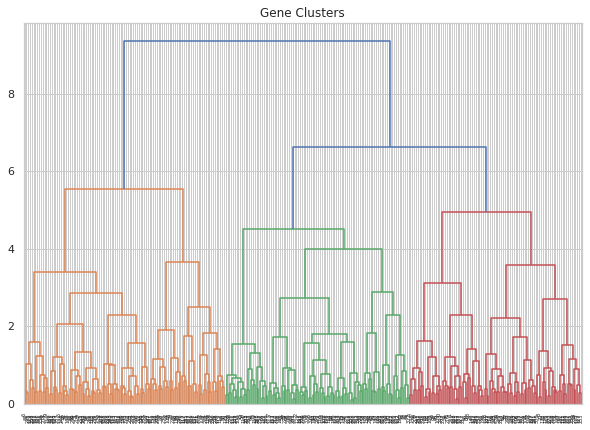

In [59]:
plt.figure(figsize=(10, 7))
plt.title("Gene Clusters")
dend = shc.dendrogram(shc.linkage(normalized_df.loc[mat.columns].dropna(), method='ward'))

In [60]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
assignments=cluster.fit_predict(normalized_df.loc[mat.columns].dropna())

<AxesSubplot:>

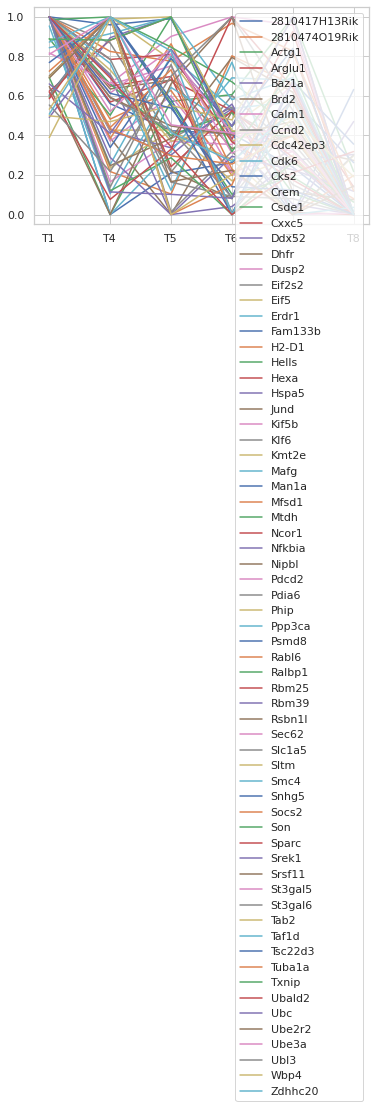

In [65]:
normalized_df.loc[mat.columns].dropna()[assignments==3].T.plot()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

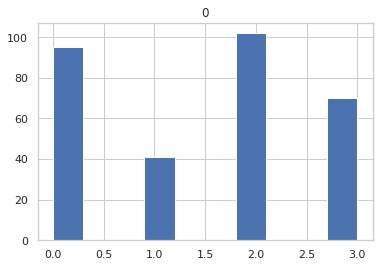

In [62]:
assi=pd.DataFrame(assignments)
assi.hist()